서울시 집값 상·하락 원인 분석 및 예측

팀명: 집값연구소

1. 프로젝트 목적: 분석을 통해 서울시의 집값 변화에 영향을 미치는 요소들을 분석하고 데이터를 기반으로 앞으로의 변화를 예측한다.

2. 데이터 소개

 ㆍ 서울시 부동산 실거래가 정보(서울 열린데이터 광장)
-	접수연도(int8), 자치구코드(int16), 자치구명(category), 법정동코드(int16), 법정동명(object), 지번구분(category), 지번구분명(category), 본번(int16), 부번(int16), 건물명(object), 계약일(int32), 물건금액(만원)(int32), 건물면적(float16), 토지면적(float16), 층(int8), 권리구분(category), 취소일(int32), 건축년도(int8), 건물용도(category), 신고구분(category), 신고한개업공인중개사(object)
분석 연관 데이터 (활용할 데이터 값만 타입정의 하였습니다.)

(https://data.seoul.go.kr/dataList/OA-21275/S/1/datasetView.do)

 ㆍ 지하철 운행 현황(파일명: 서울시_지하철_운행현황.csv / 서울시 열린 데이터광장)
-	구분별(2)(category), 운행노선및구간(object), 영업거리(float16), 역수(int16), 평일운행회수(int16), 연간총수송인원(int32), 1일평슌-수송인원(int16), 최대혼잡도(float16)

(https://data.seoul.go.kr/dataList/247/S/2/datasetView.do)

 ㆍ 버스 운행 현황(파일명: 서울시_버스_운행횟수.csv / 서울시 열린 데이터광장)
-	기준_날짜(int32), 노선_ID(int32), 정류장_ID(int32), 버스운행횟수_일(int16)

(https://data.seoul.go.kr/dataList/OA-21220/S/1/datasetView.do)

 ㆍ 인구 추이 통계(파일명: 서울시_인구추이.csv / 서울시 열린 데이터광장)
-	시점(object), 세대(int32), 합계/소계(int32)

(https://data.seoul.go.kr/dataList/11066/S/2/datasetView.do)

 ㆍ 금리 변화 데이터(파일명: 한국은행_금리.csv / 한국은행 경제통계시스템)
-	통계표(object), 계정항목(object), [각연도,월](float8)

(https://ecos.bok.or.kr/#/SearchStat)

 ㆍ 서울시 5대 범죄 데이터(파일명: 서울시_5대범죄_발생현황.csv / 서울시 열린 데이터광장)
-	자치구별(2)(object), 소계/발생(int32), 소계/검거(int32)

(https://data.seoul.go.kr/dataList/316/S/2/datasetView.do)

 ㆍ 서울시 대규모 점포 정보(파일명: 서울시_대규모점포_인허가.csv / 서울시 열린 데이터광장)
-	인허가일자(object), 영업상태코드(category), 영업상태명(category), 상세영업상태명(category), 폐업일자(object), 소재지면적(float32), 업태구분명(category)

(https://data.seoul.go.kr/dataList/OA-16096/S/1/datasetView.do)


3. 데이터 분석 계획


1. 주택 가격에 영향을 미치는 주요 요인 분석
2. 교통 인프라(역 개수)와 주택 가격 간 상관관계 탐색
3. 서울시 자치구별 범죄 발생 수와 부동산 실거래가의 상관관계 분석
4. 지역별 범죄율에 따른 영향이 있는지 확인
5. 대형 마트등 상권 입점에 따른 변화분석

4. 데이터 분석

4.1 데이터 분석 1  : 주택 가격에 영향을 미치는 주요 요인 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree


In [2]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df20 = pd.read_csv("/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2020).csv", encoding='cp949')
df21 = pd.read_csv("/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2021).csv", encoding='cp949')
df22 = pd.read_csv("/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2022).csv", encoding='cp949')
df23 = pd.read_csv("/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2023).csv", encoding='cp949')


<ipython-input-4-54c15e1f87ec>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df20 = pd.read_csv("/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2020).csv", encoding='cp949')
<ipython-input-4-54c15e1f87ec>:2: DtypeWarning: Columns (7,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df21 = pd.read_csv("/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2021).csv", encoding='cp949')


In [5]:
df23.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2023,11380,은평구,10200,녹번동,1.0,대지,152.0,59.0,이지플아트빌(152-59),...,33500,43.04,37.00,2.0,NaN,NaN,2005.0,연립다세대,중개거래,서울 은평구
1,2023,11590,동작구,10700,사당동,NaN,NaN,NaN,NaN,NaN,...,90000,146.14,98.60,NaN,NaN,NaN,1987.0,단독다가구,중개거래,서울 강남구
2,2023,11590,동작구,10700,사당동,NaN,NaN,NaN,NaN,NaN,...,190000,148.23,202.70,NaN,NaN,NaN,1970.0,단독다가구,중개거래,서울 강남구
3,2023,11710,송파구,10400,송파동,1.0,대지,95.0,7.0,HANYANGLEEPS,...,11000,13.38,10.61,5.0,NaN,NaN,2012.0,연립다세대,중개거래,서울 송파구
4,2023,11530,구로구,10200,구로동,1.0,대지,546.0,17.0,오크트리빌구로1차,...,29550,29.99,20.69,3.0,NaN,NaN,2023.0,연립다세대,직거래,NaN


In [6]:
# 1) 서울 25개 자치구 리스트
gu_list = [
    "강남구","강동구","강북구","강서구","관악구","광진구","구로구","금천구",
    "노원구","도봉구","동대문구","동작구","마포구","서대문구","서초구","성동구",
    "성북구","송파구","양천구","영등포구","용산구","은평구","종로구","중구","중랑구"
]

# 2) 연도별 DataFrame을 순서대로 리스트에 담기
dfs_year = [df20, df21, df22, df23]

# 3) 자치구별로 연도 순서대로 데이터 추출·병합
dfs_gu = {
    gu: pd.concat(
        [df[df['자치구명'] == gu] for df in dfs_year],
        ignore_index=True
    )
    for gu in gu_list
}

# 강남구만 확인 dfs_gu[] 괄호 안에 구명만 바꾸면 됨
df_gangnam = dfs_gu['강남구']
print(df_gangnam.shape)
df_gangnam.head()


(20177, 21)


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2020,11680,강남구,10300,개포동,1.0,대지,1280,0.0,래미안블레스티지,...,251000,84.94,0.0,1.0,NaN,NaN,2019.0,아파트,NaN,NaN
1,2020,11680,강남구,10300,개포동,1.0,대지,0660,1.0,디에이치 퍼스티어 아이파크,...,194005,59.97,0.0,18.0,입주권,NaN,0.0,아파트,NaN,NaN
2,2020,11680,강남구,10100,역삼동,1.0,대지,0763,16.0,래미안그레이튼,...,193500,59.97,0.0,19.0,NaN,NaN,2009.0,아파트,NaN,NaN
3,2020,11680,강남구,11000,압구정동,1.0,대지,0456,0.0,"현대6차(78~81,83,84,86,87동)",...,397000,144.20,0.0,11.0,NaN,NaN,1978.0,아파트,NaN,NaN
4,2020,11680,강남구,10600,대치동,1.0,대지,0891,6.0,테헤란로대우아이빌(891-6),...,43500,35.51,NaN,23.0,NaN,NaN,2004.0,아파트,NaN,NaN


In [7]:
price_col = "물건금액(만원)"
# 1) 카테고리화 범주 계산
p_min = df20[price_col].min()
p_max = df20[price_col].max()
p_avg = df20[price_col].mean()
pivot_high = (p_avg + p_max) / 2
pivot_low  = (p_avg + p_min) / 2

# 2) 가격 → 카테고리 매핑 함수 정의
def price_category(price):
    if price > pivot_high:
        return 1
    elif price > pivot_low:
        return 2
    else:
        return 3

# 3) apply 로 컬럼 생성
df20['가격범위'] = df20[price_col].apply(price_category)
df21['가격범위'] = df20[price_col].apply(price_category)
df22['가격범위'] = df20[price_col].apply(price_category)
df23['가격범위'] = df20[price_col].apply(price_category)
# 확인
df20.head()


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,가격범위
0,2020,11230,동대문구,11000,이문동,NaN,NaN,NaN,NaN,NaN,...,75.57,132.00,NaN,NaN,NaN,1967.0,단독다가구,NaN,NaN,2
1,2020,11680,강남구,10300,개포동,1.0,대지,1280,0.0,래미안블레스티지,...,84.94,0.00,1.0,NaN,NaN,2019.0,아파트,NaN,NaN,2
2,2020,11260,중랑구,10300,중화동,NaN,NaN,NaN,NaN,NaN,...,99.18,195.00,NaN,NaN,NaN,1977.0,단독다가구,NaN,NaN,2
3,2020,11710,송파구,10400,송파동,1.0,대지,0097,44.0,삼구주택(97-44),...,55.20,29.89,3.0,NaN,NaN,2011.0,연립다세대,NaN,NaN,2
4,2020,11560,영등포구,11500,당산동5가,1.0,대지,0042,0.0,당산삼성래미안4차,...,133.42,0.00,12.0,NaN,NaN,2003.0,아파트,NaN,NaN,2


In [8]:
# 1) price_cat처럼 함수 정의하기
def building_code(bld):
    if   bld == "단독다가구": return 0
    elif bld == "아파트":     return 1
    elif bld == "연립다세대": return 2
    elif bld == "오피스텔":   return 3
    else:                    return -1  # 기타

dfs_year = [df20, df21, df22, df23]
# 2) apply 로 새로운 컬럼 생성
for df in dfs_year:
    df['용도_code'] = df['건물용도'].apply(building_code)

# 3) 결과 확인
print(df[['건물용도','용도_code']].head())
print("용도_code 고유값:", sorted(df['용도_code'].unique()))


    건물용도  용도_code
0  연립다세대        2
1  단독다가구        0
2  단독다가구        0
3  연립다세대        2
4  연립다세대        2
용도_code 고유값: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]


In [9]:
# 1) 분석에 쓸 칼럼 리스트
col_names = ['자치구코드','법정동코드','물건금액(만원)','건물면적(㎡)','층','건축년도','용도_code']

# 2) 각 연도별로 서브셋 복사
df20_sub = df20[col_names].copy()
df21_sub = df21[col_names].copy()
df22_sub = df22[col_names].copy()
df23_sub = df23[col_names].copy()

# 3) 확인
print(df20_sub.shape, df21_sub.shape, df22_sub.shape, df23_sub.shape)
df20_sub.head()


(183900, 7) (138699, 7) (66345, 7) (69801, 7)


,자치구코드,법정동코드,물건금액(만원),건물면적(㎡),층,건축년도,용도_code
0,11230,11000,85000,75.57,NaN,1967.0,0
1,11680,10300,251000,84.94,1.0,2019.0,1
2,11260,10300,85000,99.18,NaN,1977.0,0
3,11710,10400,38000,55.20,3.0,2011.0,2
4,11560,11500,180000,133.42,12.0,2003.0,1


In [10]:

# 분석용 컬럼 리스트
col_names = ['자치구코드','법정동코드','물건금액(만원)','건물면적(㎡)','층','건축년도','용도_code']

dfs_sub = [df20_sub, df21_sub, df22_sub, df23_sub]

for df in dfs_sub:
    for col in col_names:
        # inf나 -inf 를 NaN 으로, NaN을 0으로 채운 뒤 정수로 변환
        df[col] = (
            df[col]
            .replace([np.inf, -np.inf], np.nan)
            .fillna(0)
            .astype(int)
        )

# 변환 결과 확인
print(df23_sub[col_names].isna().sum())  # 모두 0이어야 함
print(df23_sub.dtypes)
df23_sub.head()


자치구코드       0
법정동코드       0
물건금액(만원)    0
건물면적(㎡)     0
층           0
건축년도        0
용도_code     0
dtype: int64
자치구코드       int64
법정동코드       int64
물건금액(만원)    int64
건물면적(㎡)     int64
층           int64
건축년도        int64
용도_code     int64
dtype: object


,자치구코드,법정동코드,물건금액(만원),건물면적(㎡),층,건축년도,용도_code
0,11380,10200,33500,43,2,2005,2
1,11590,10700,90000,146,0,1987,0
2,11590,10700,190000,148,0,1970,0
3,11710,10400,11000,13,5,2012,2
4,11530,10200,29550,29,3,2023,2


오차값(MSE): 1683877573.6, 분석률(R²): 0.774


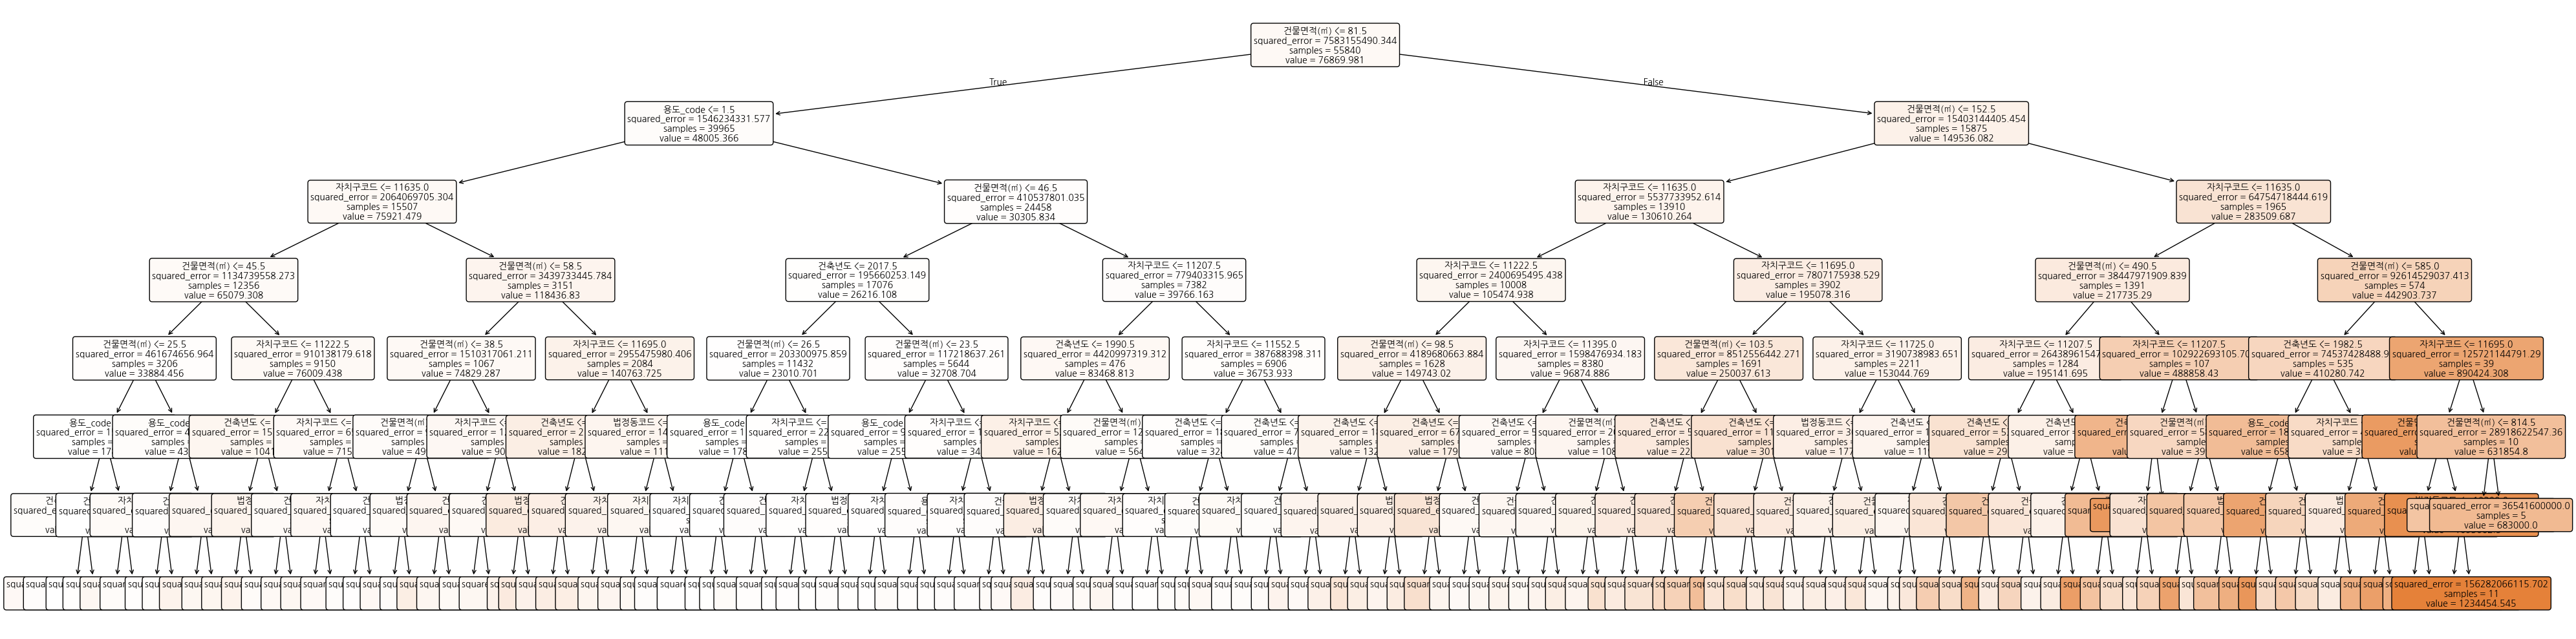

     자치구코드: 0.257
     법정동코드: 0.015
   건물면적(㎡): 0.595
         층: 0.002
      건축년도: 0.063
   용도_code: 0.068


In [11]:
# 사용할 컬럼 정의
feature_cols = ['자치구코드','법정동코드','건물면적(㎡)','층','건축년도','용도_code']
target_col   = '물건금액(만원)'

# 입력(X), 타깃(y) 분리
X = df23_sub[feature_cols]
y = df23_sub[target_col]

# 학습/테스트 세트 분리 (예: 80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 모델 생성 (깊이 제한 등 과적합 방지 파라미터 조정 가능)
model = DecisionTreeRegressor(
    max_depth=7,         # 트리 깊이 제한
    min_samples_leaf=5,  # 잎사귀 노드 최소 샘플 수
    random_state=42
)

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"오차값(MSE): {mse:.1f}, 분석률(R²): {r2:.3f}")

plt.figure(figsize=(40,10))
plot_tree(
    model,
    feature_names=feature_cols,
    filled=True, rounded=True, fontsize=10
)
plt.tight_layout()
plt.show()

# 변수 중요도
for name, imp in zip(feature_cols, model.feature_importances_):
    print(f"{name:>10s}: {imp:.3f}")


<b>분석방법</b><br>
트리 노드 읽기 : 맨 위는 분류 기준 [예: 건축년도 <= ?]<br>
샘플 수(samples): 해당 조건을 만족하는 거래 건수 (예: 4,321개)<br>
예측값(Value): 이 노드에서의 타깃(물건금액) 평균(또는 분류트리라면 클래스 비율)<br>
<br>
관심있는 지역같은 분류 기준 따라가서 분석 등<br>
오차값은 예측값의 차이의 제곱, 여기서는 부동산 예측 가격의 차이의 제곱<br>
R2은 전체 데이터를 해석하는 능력, 1에 가까울수록 좋음. 설명률이라 생각하면 편함, 여기서는 71.9%의 설명률<br>

In [12]:
# NaN 을 지울 컬럼 목록
drop_cols = ['건축년도', '건물면적(㎡)']

for df in dfs_sub:
    before = df.shape[0]
    # subset 에 지정한 컬럼 중 하나라도 NaN 이면 그 행을 삭제
    df.dropna(subset=drop_cols, inplace=True)
    # 인덱스 재설정 (옵션)
    df.reset_index(drop=True, inplace=True)
    after = df.shape[0]
    print(f"Deleted {before-after} rows; remaining {after} rows")

Deleted 0 rows; remaining 183900 rows
Deleted 0 rows; remaining 138699 rows
Deleted 0 rows; remaining 66345 rows
Deleted 0 rows; remaining 69801 rows


In [13]:
dfs = {
    '2020': df20_sub,
    '2021': df21_sub,
    '2022': df22_sub,
    '2023': df23_sub
}
for year, df in dfs.items():
    axes = scatter_matrix(
        df[col_names],
        alpha=0.5,
        diagonal='hist',
        figsize=(30, 30)
    )
    for ax in axes.flatten():
        ax.tick_params(axis='x', labelrotation=90)
        ax.tick_params(axis='y', labelrotation=0)
    plt.suptitle(f"{year}년 산점도 행렬", y=1.02, fontsize=20)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

<b>1. 물건금액(만원) ↔ 건물면적(㎡)
뚜렷한 양의 상관관계

건물면적이 클수록 물건금액이 높아지는 패턴이 보입니다.

특히 면적 50 - 200㎡ 구간에서 가격이 1억 - 10억까지 고르게 분포하며, 면적이 커질수록 가격의 분산(흩어짐)도 커집니다.


<b>2. 물건금액 ↔ 건축년도
최신 건축물이 다소 높은 가격

건축년도가 2000년대 이후(≈ 2000~2023)일수록 가격 클러스터가 상향 이동해 있습니다.

다만 오래된(1970~1990년대) 건물도 고가(outlier) 사례가 일부 있어, 연식 단독으로만 가격을 설명하기엔 한계가 있습니다.

<b>3. 물건금액 ↔ 층
아파트(중·고층) vs. 단독주택(저층)

용도_code=1(아파트) 구간의 층수가 5층 이상으로 몰리면서 가격도 중고가 영역(3~6억)에 집중돼 있고,

용도_code=0(단독다가구)나 2(연립다세대)는 1~5층 구간에 분포하며 가격도 비교적 낮은 편을 차지합니다.

<b>4. 물건금액 ↔ 용도_code
용도별 가격 차이

코드 순서대로:

0=단독다가구 → 가격분포 낮음(대체로 1~3억)

1=아파트 → 가격분포 높음(3~10억)

2=연립다세대 → 중간(2~5억)

3=오피스텔 → 상대적으로 좁은 분포(3~4억)

즉, 건물 종류 중 아파트가 가장 높은 가격대를 형성하는 걸 확인할 수 있습니다.

<b>5. 자치구코드 & 법정동코드
지역별 가격 클러스터

자치구코드(11xxx~12xxx 범위)가 클수록(→ 강남·서초 등) 물건금액이 높아지는 경향이 약하게 보입니다.

<b>법정동코드는 ‘숫자 코드’이므로 순서 자체보다도, 특정 동(예: 10700~11000 사이)에 가격 편차가 크다는 사실을 통해
<b>→ 후속으로 교차표나 히트맵으로 주요 동별 평균가를 확인하면 의미 있는 인사이트가 나올 수 있습니다.

<b>6. 이상치(Outlier)
물건금액 축에서 원가의 2~3배 이상을 넘어서는 초고가 거래(10억 이상)나, 1천만 원 미만의 저가 거래 사례가 포착됩니다.

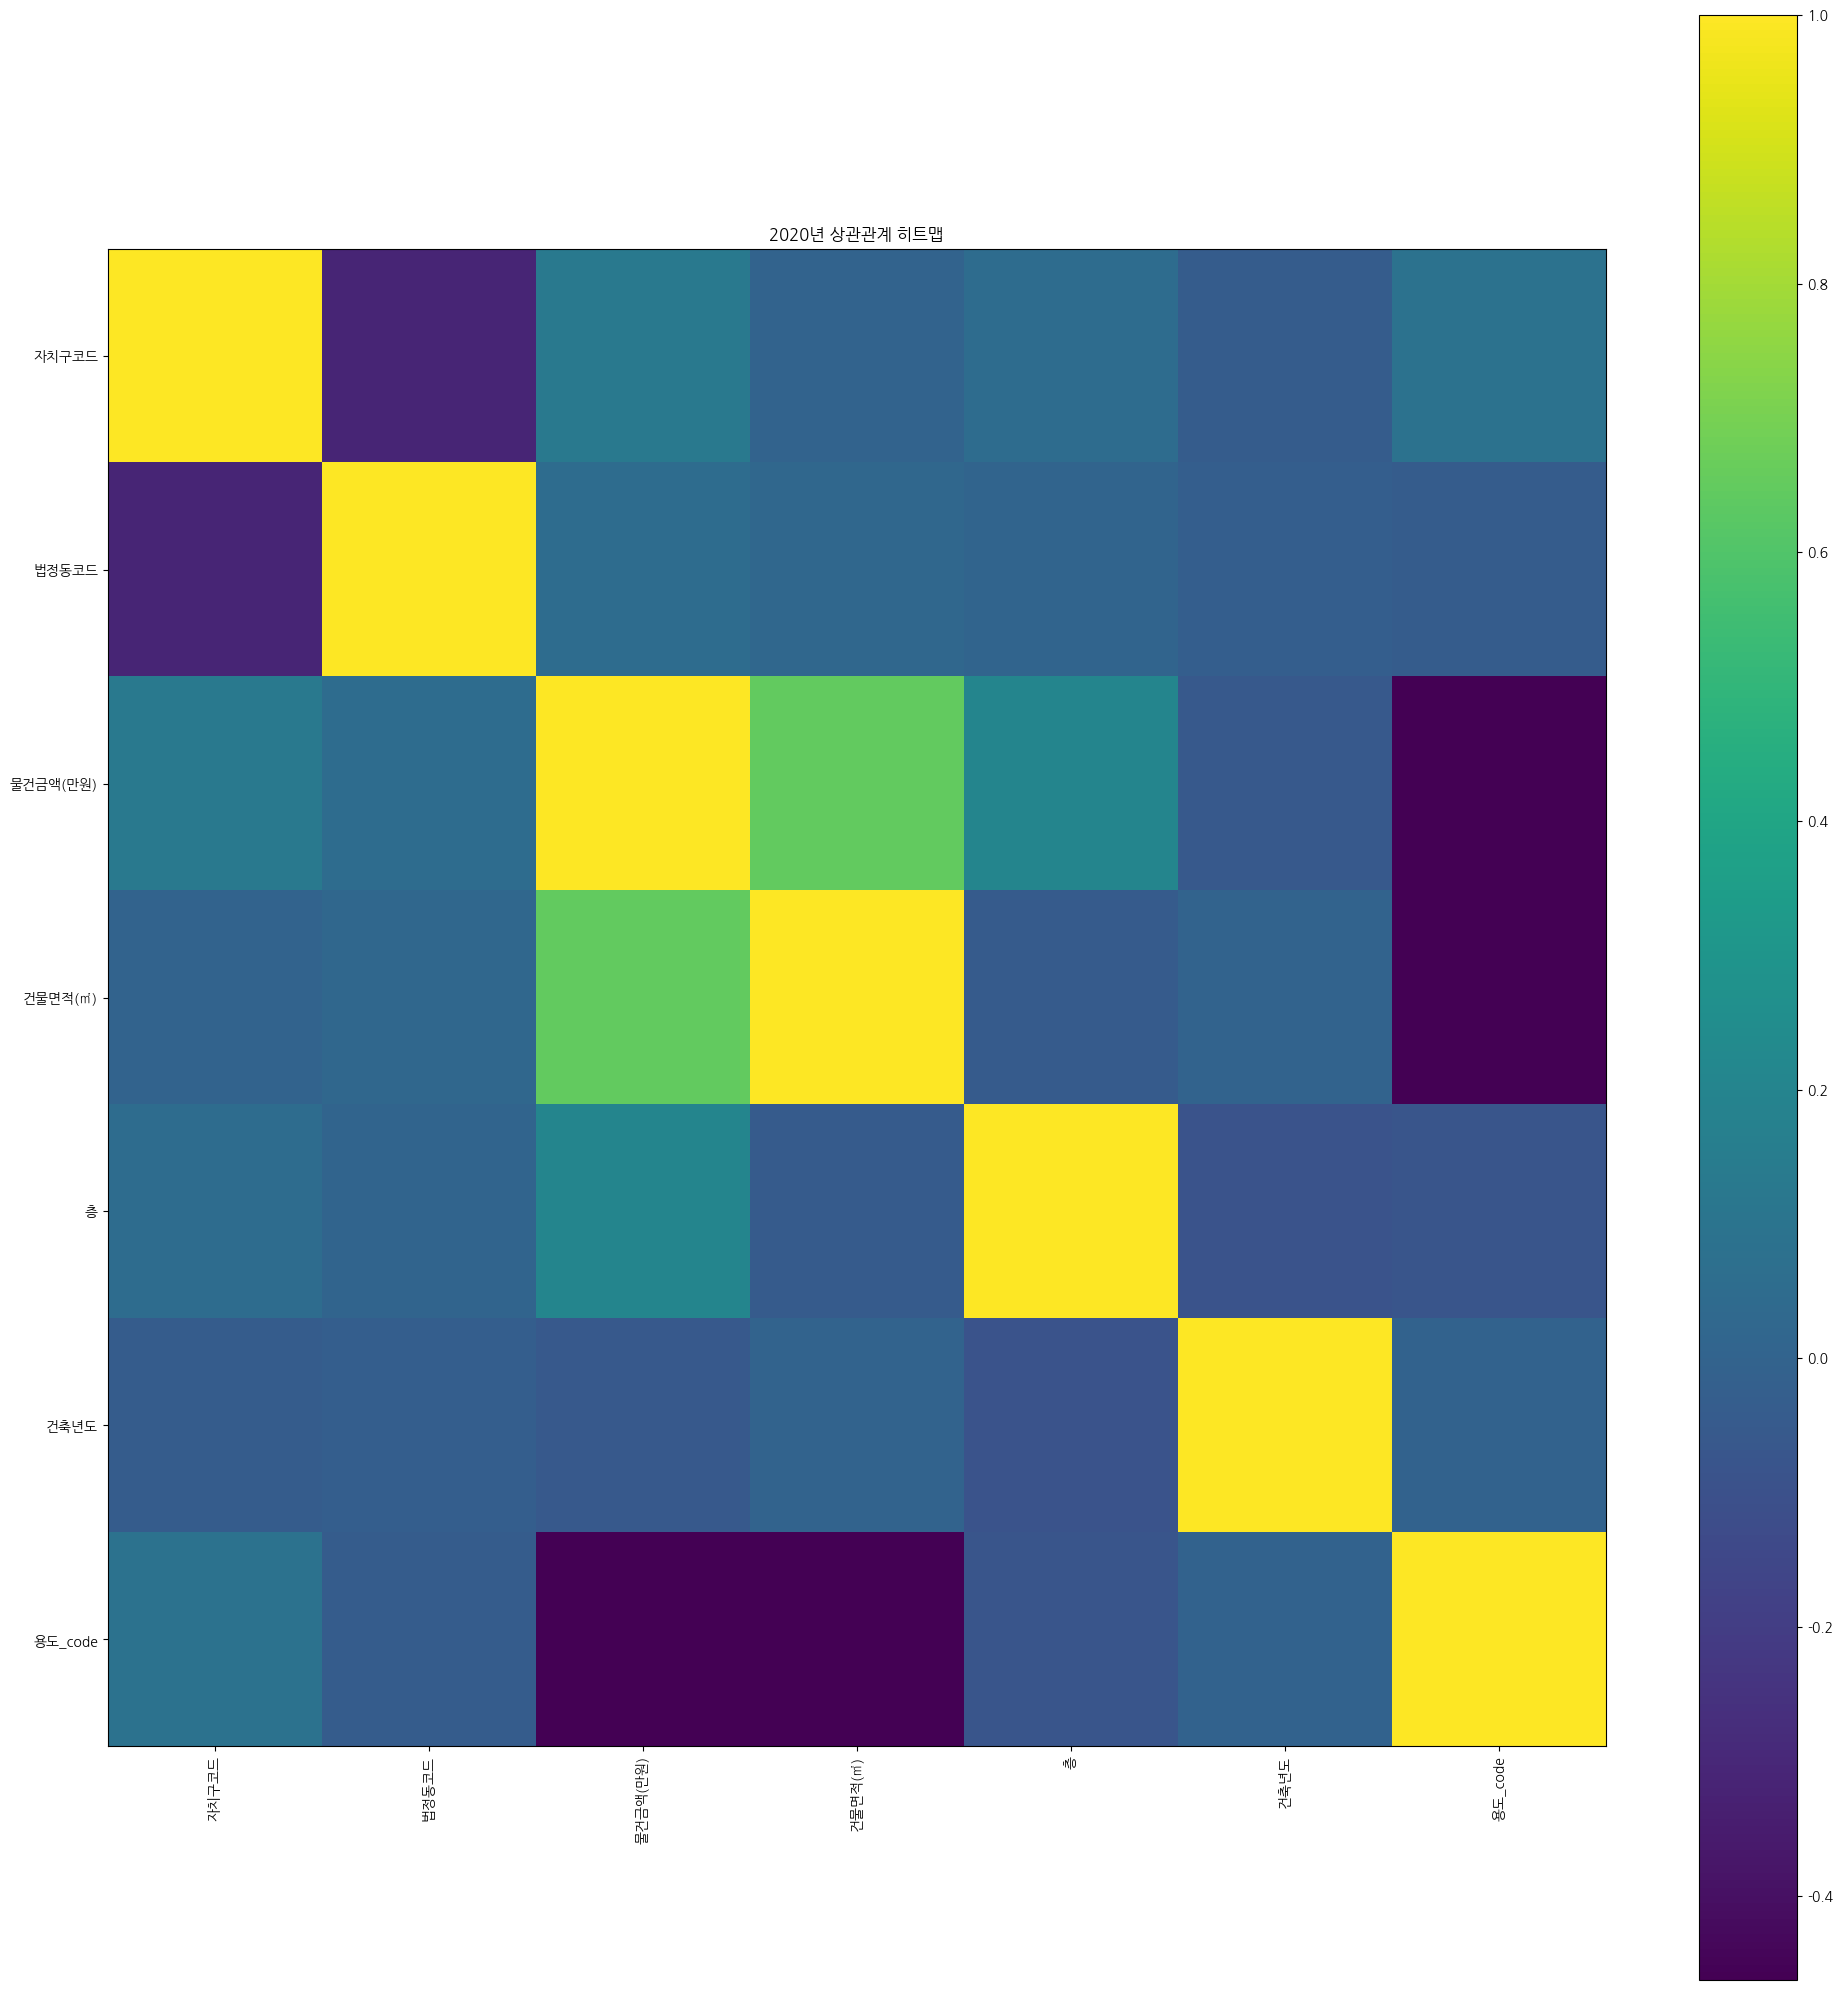

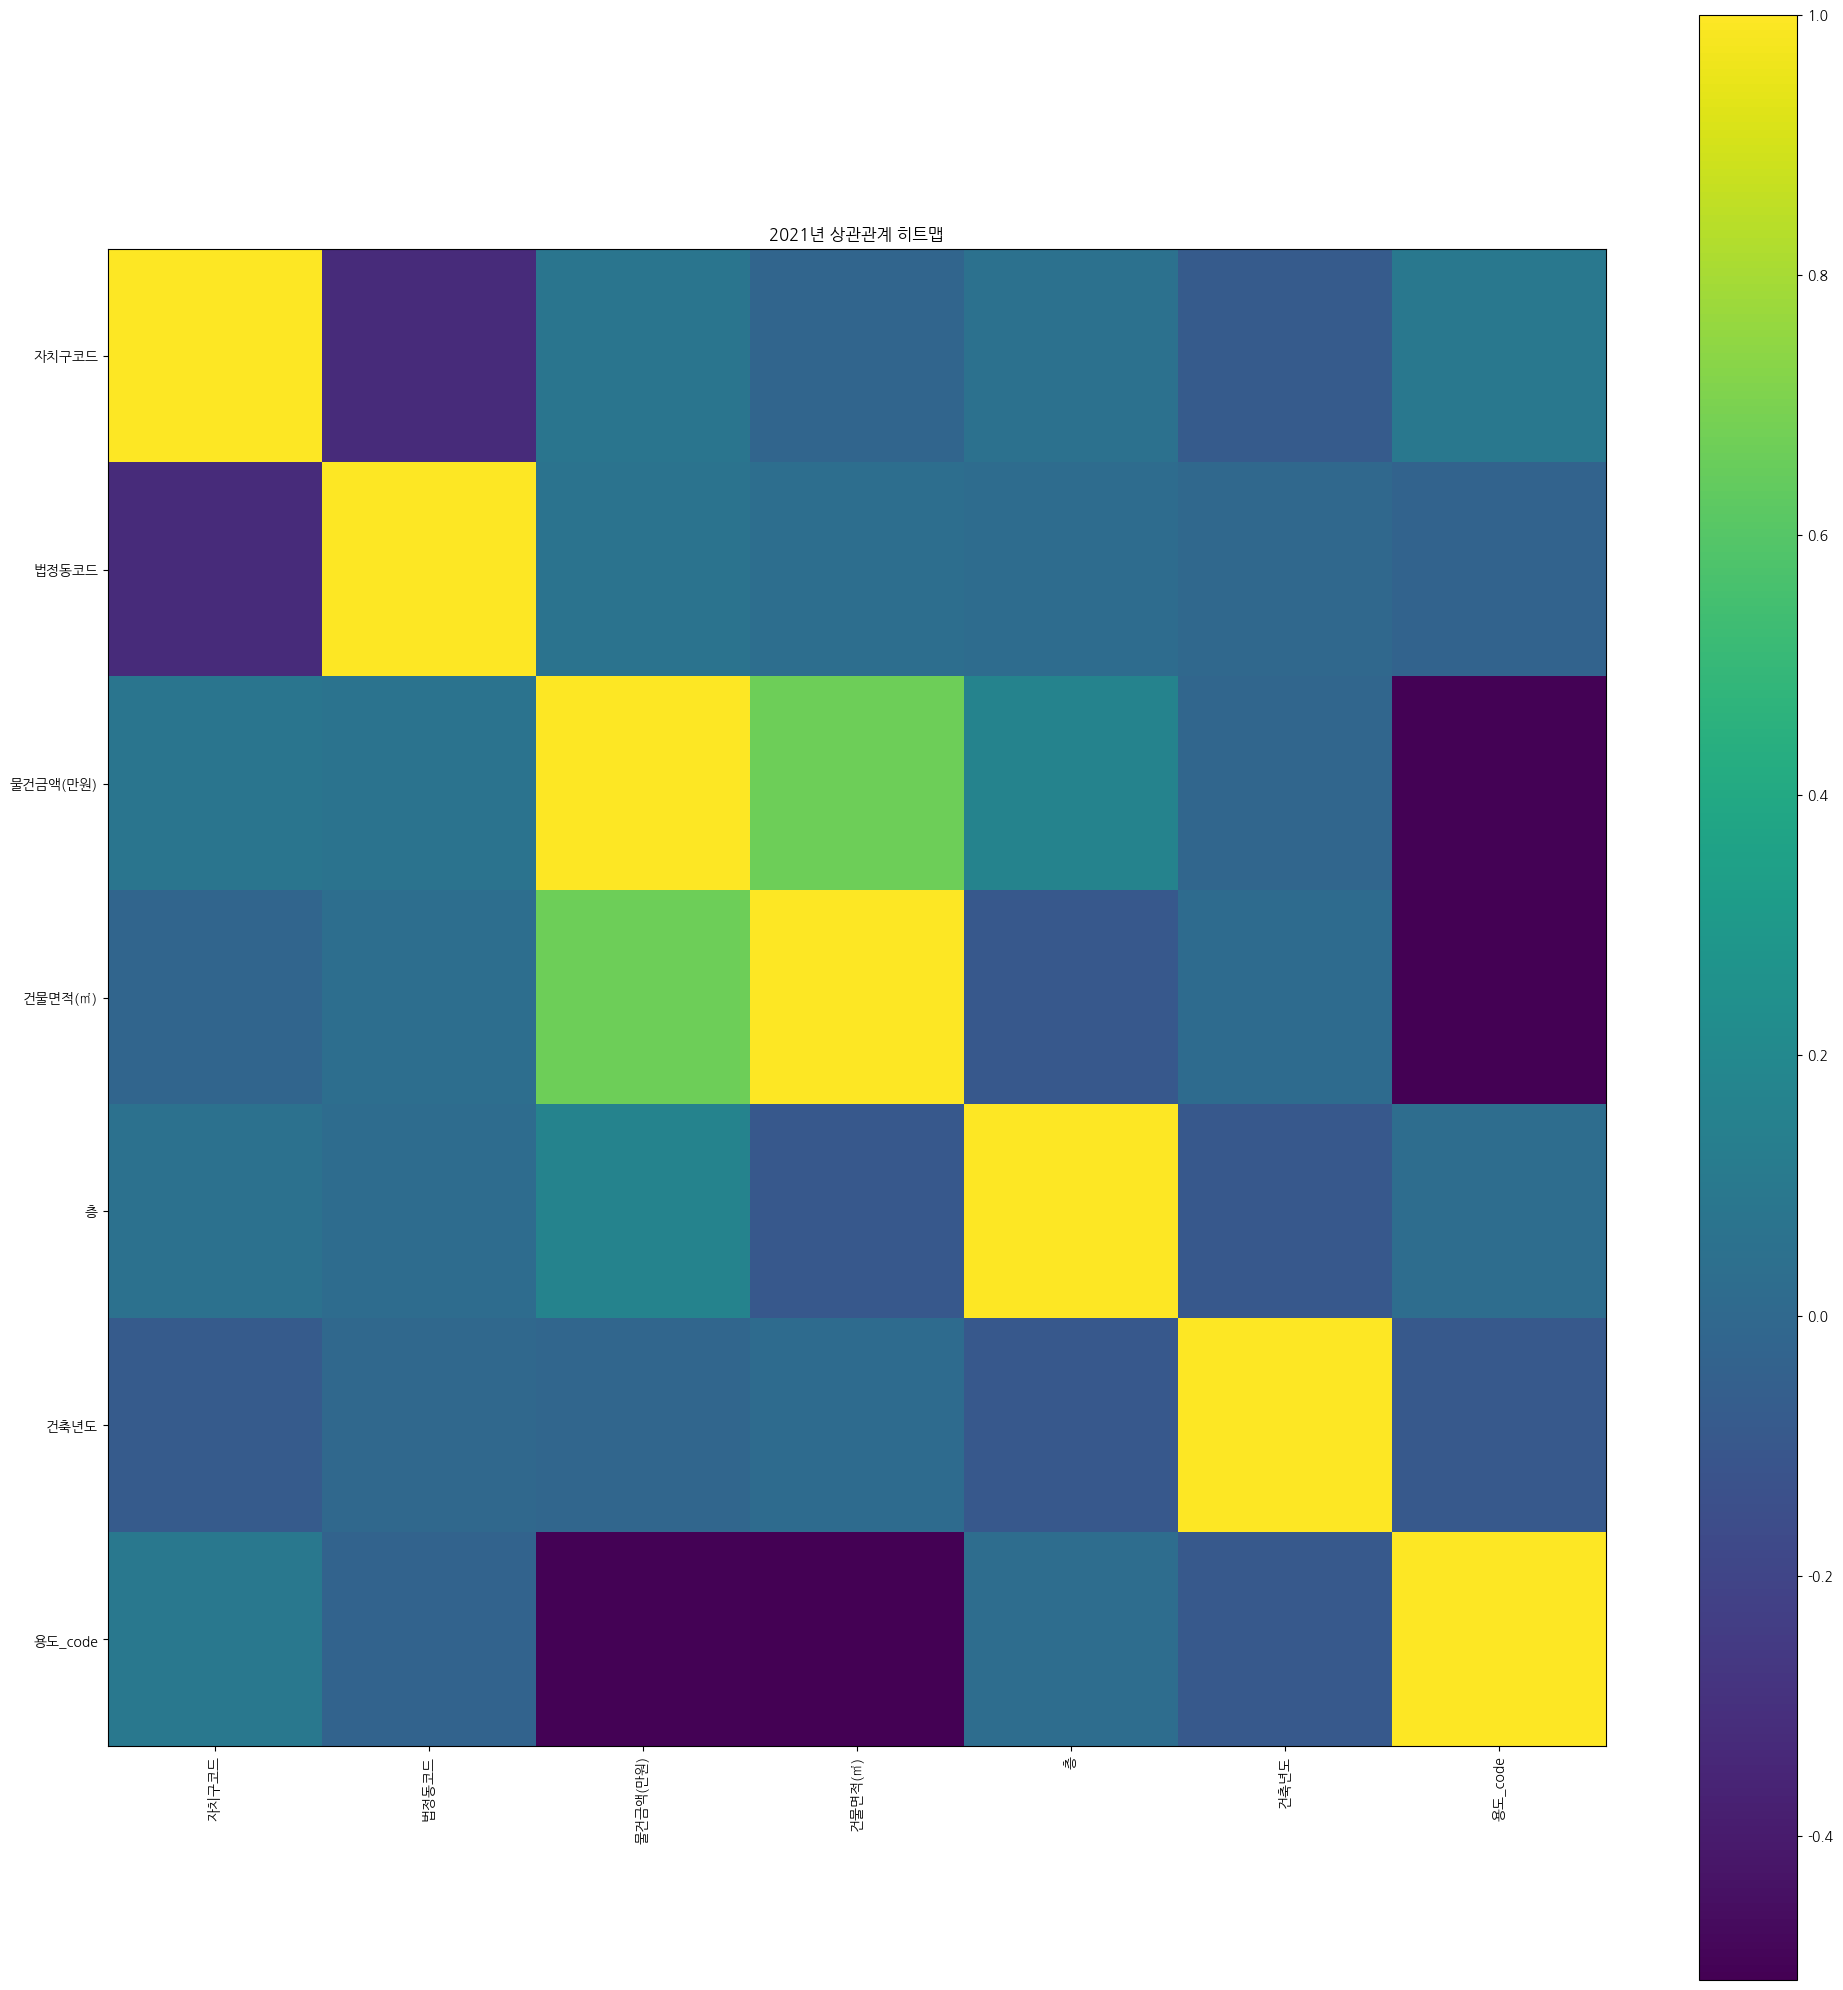

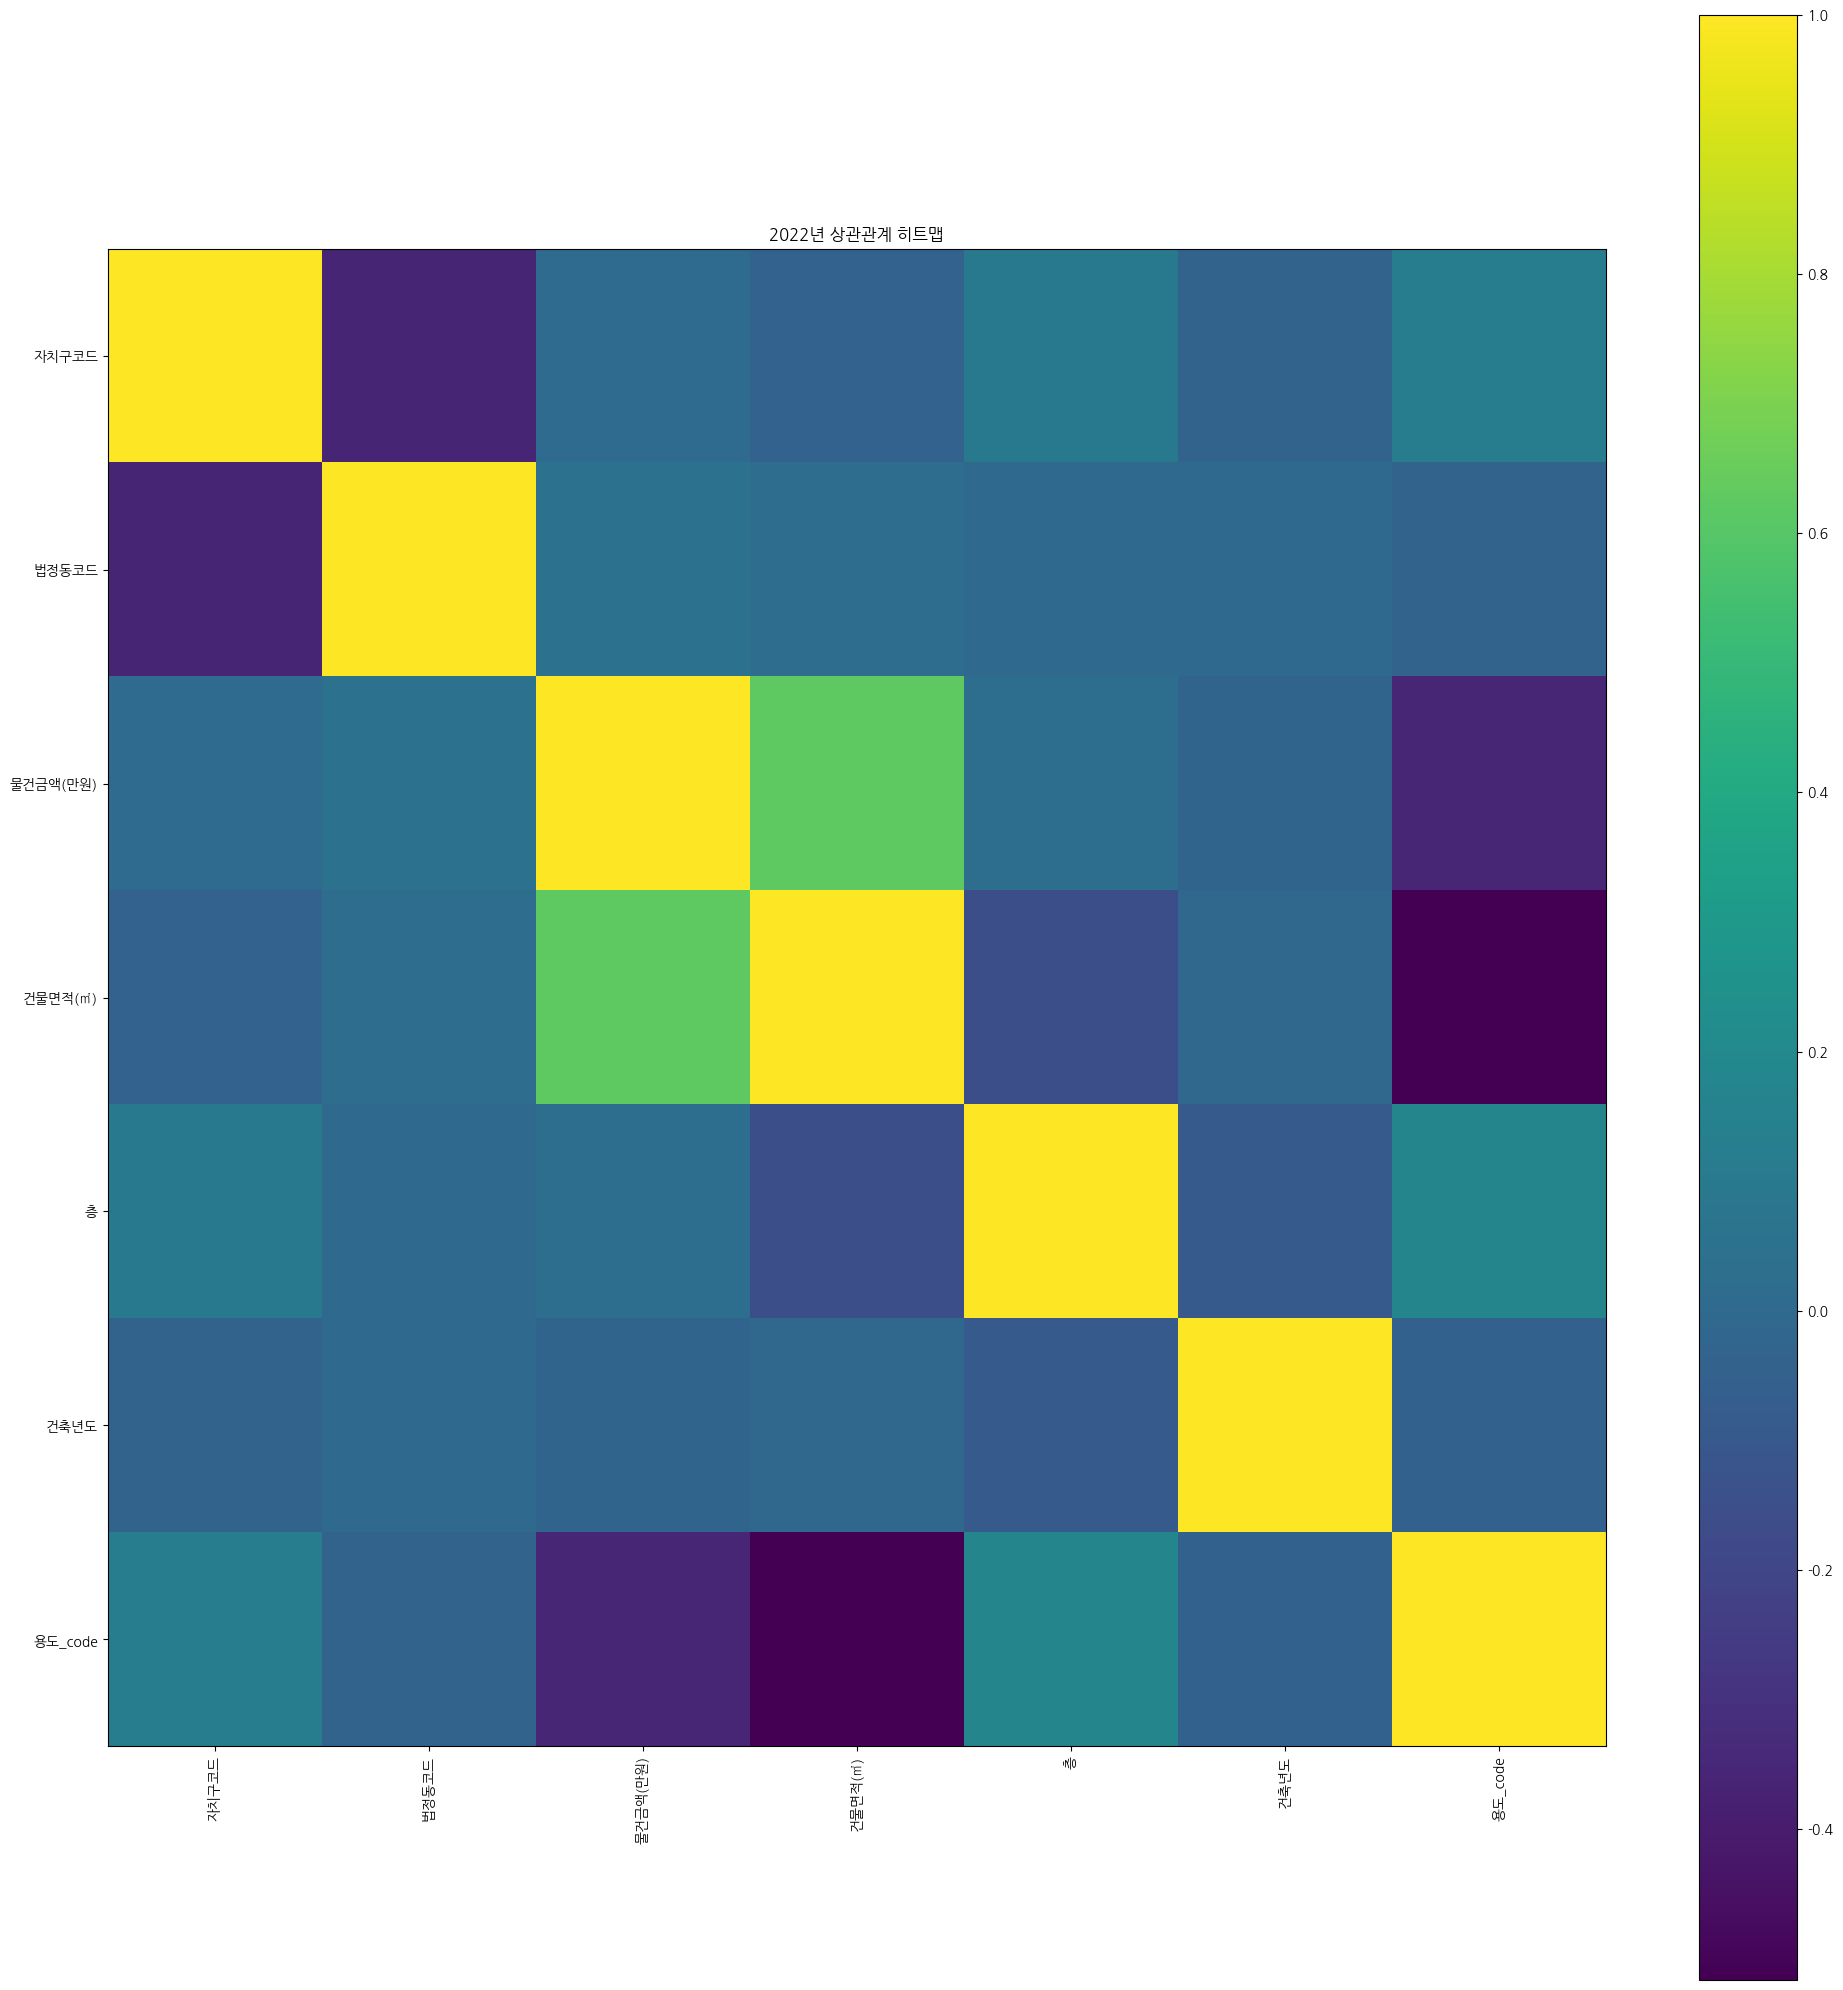

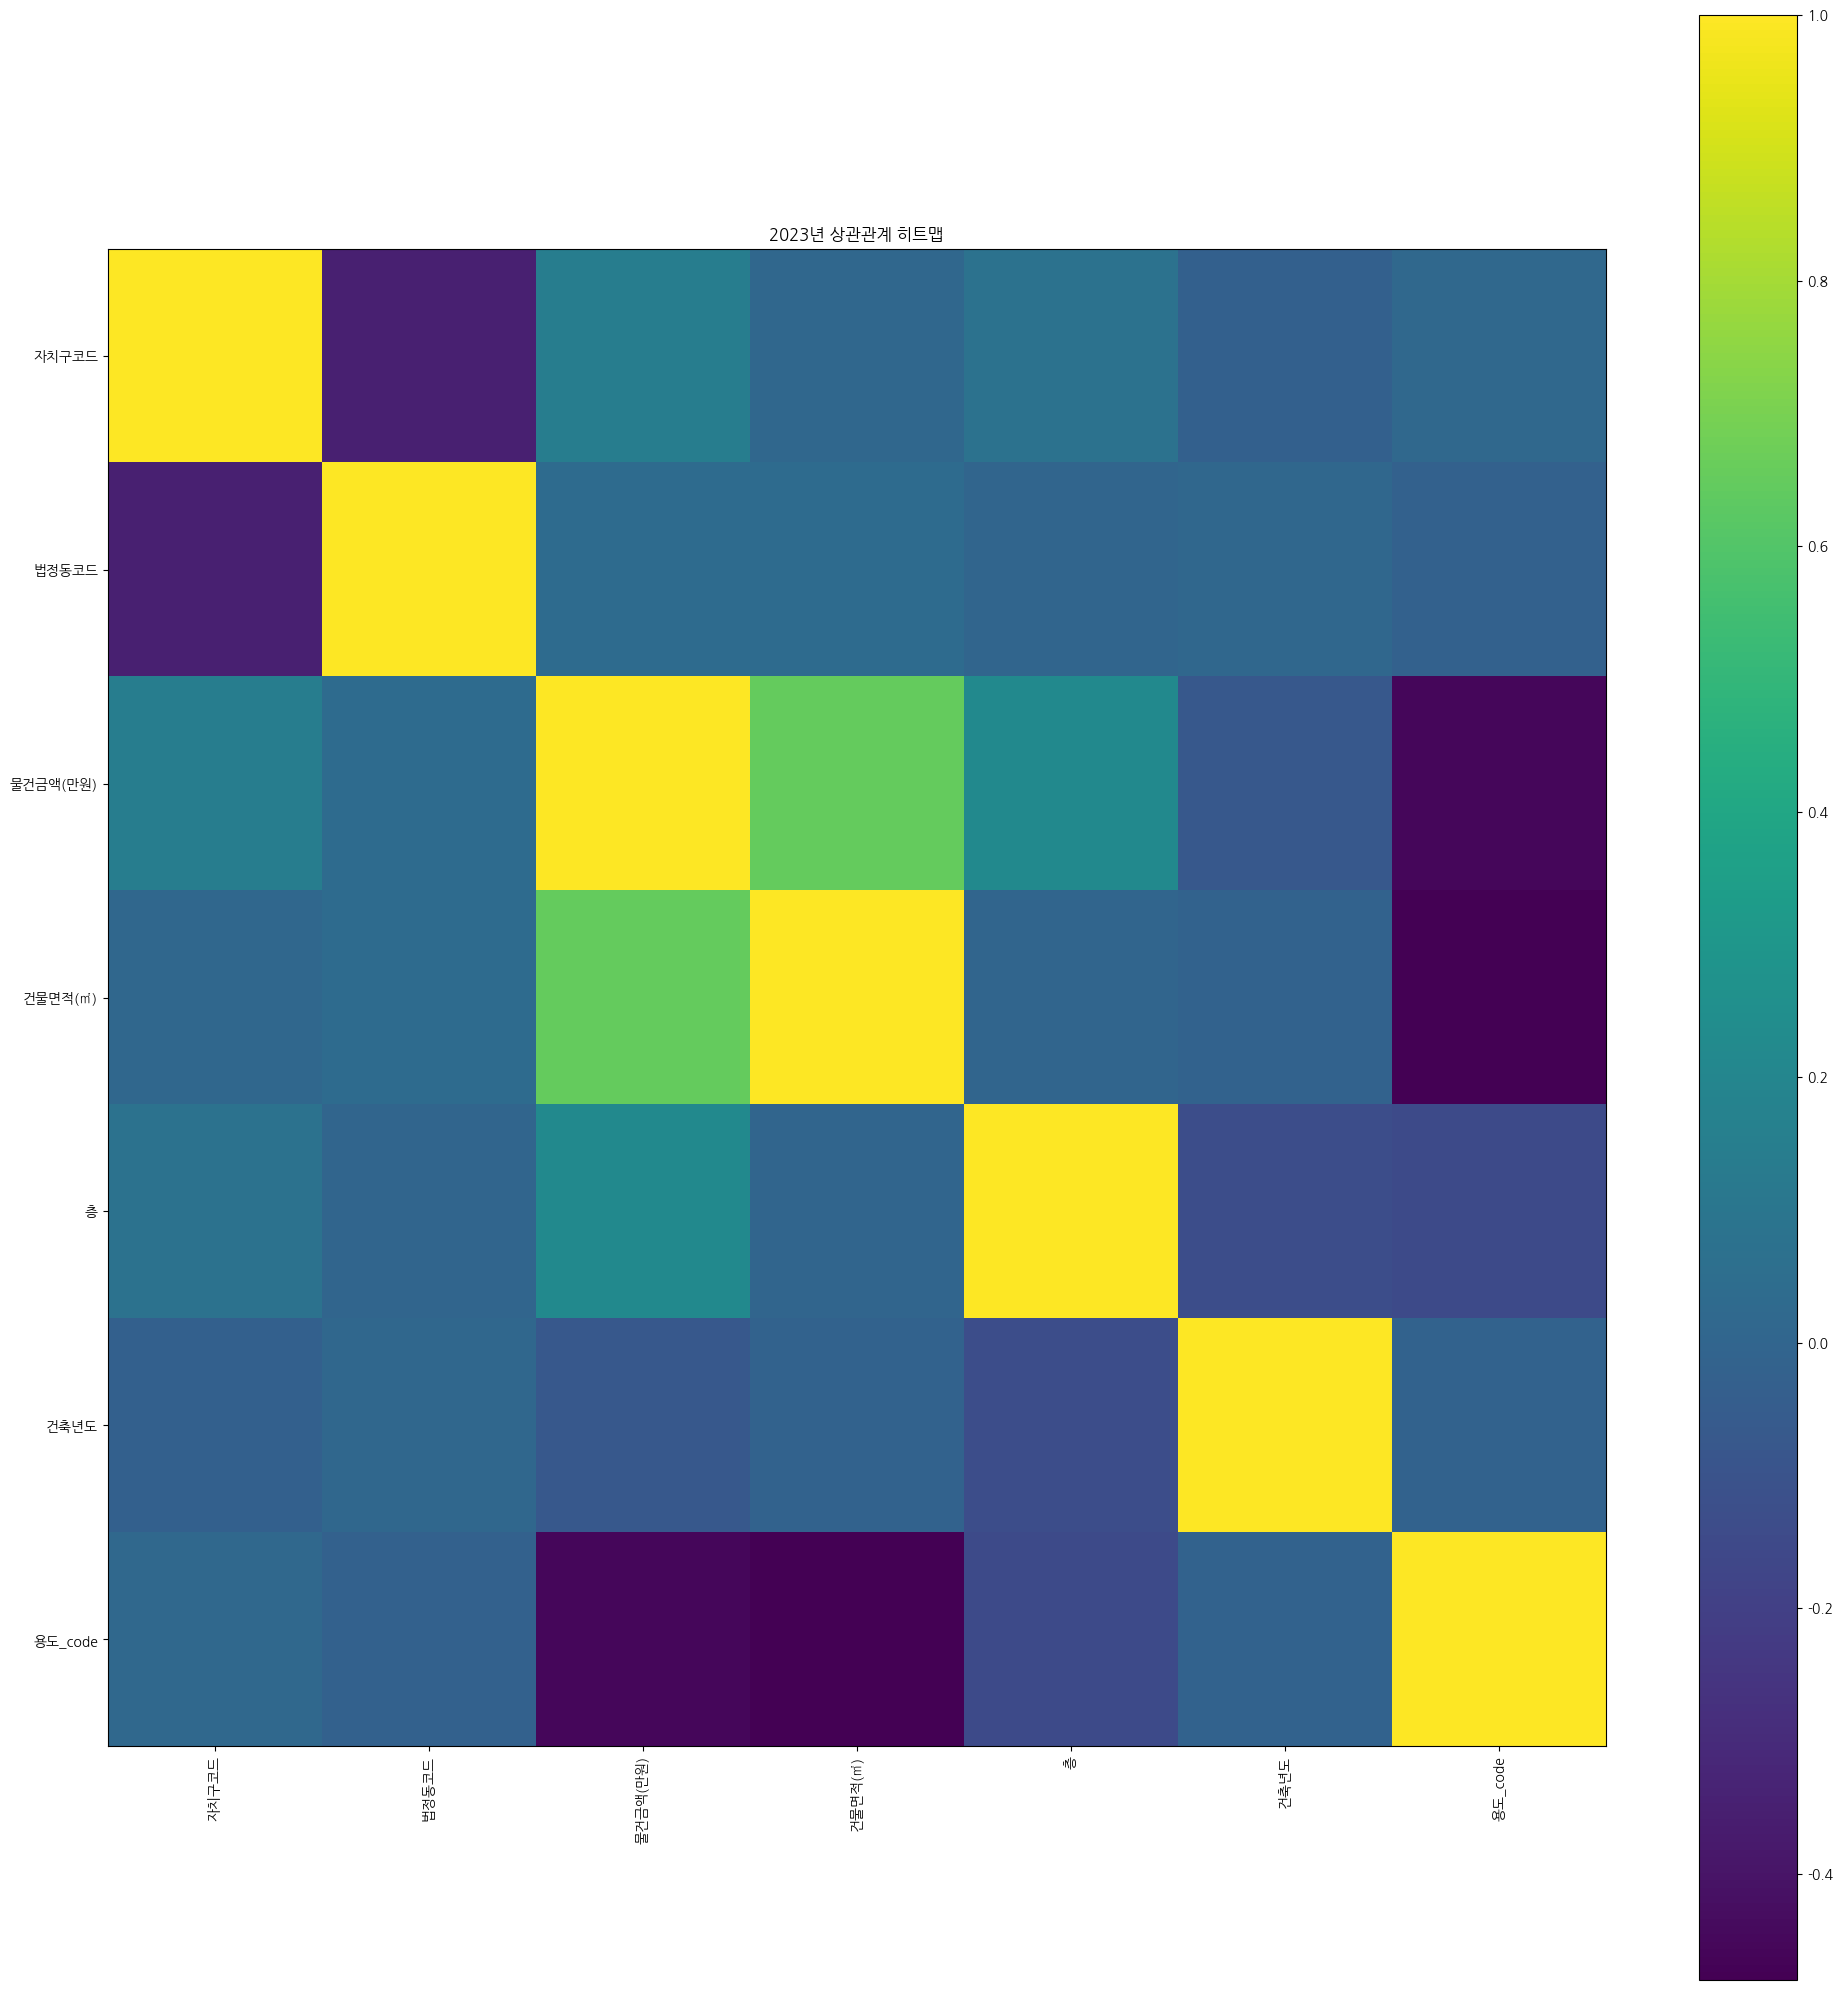

In [14]:
for year, df in dfs.items():
    corr = df[col_names].corr()
    plt.figure(figsize=(20, 20))
    plt.imshow(corr)
    plt.xticks(range(len(col_names)), col_names, rotation=90)
    plt.yticks(range(len(col_names)), col_names)
    plt.title(f"{year}년 상관관계 히트맵")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

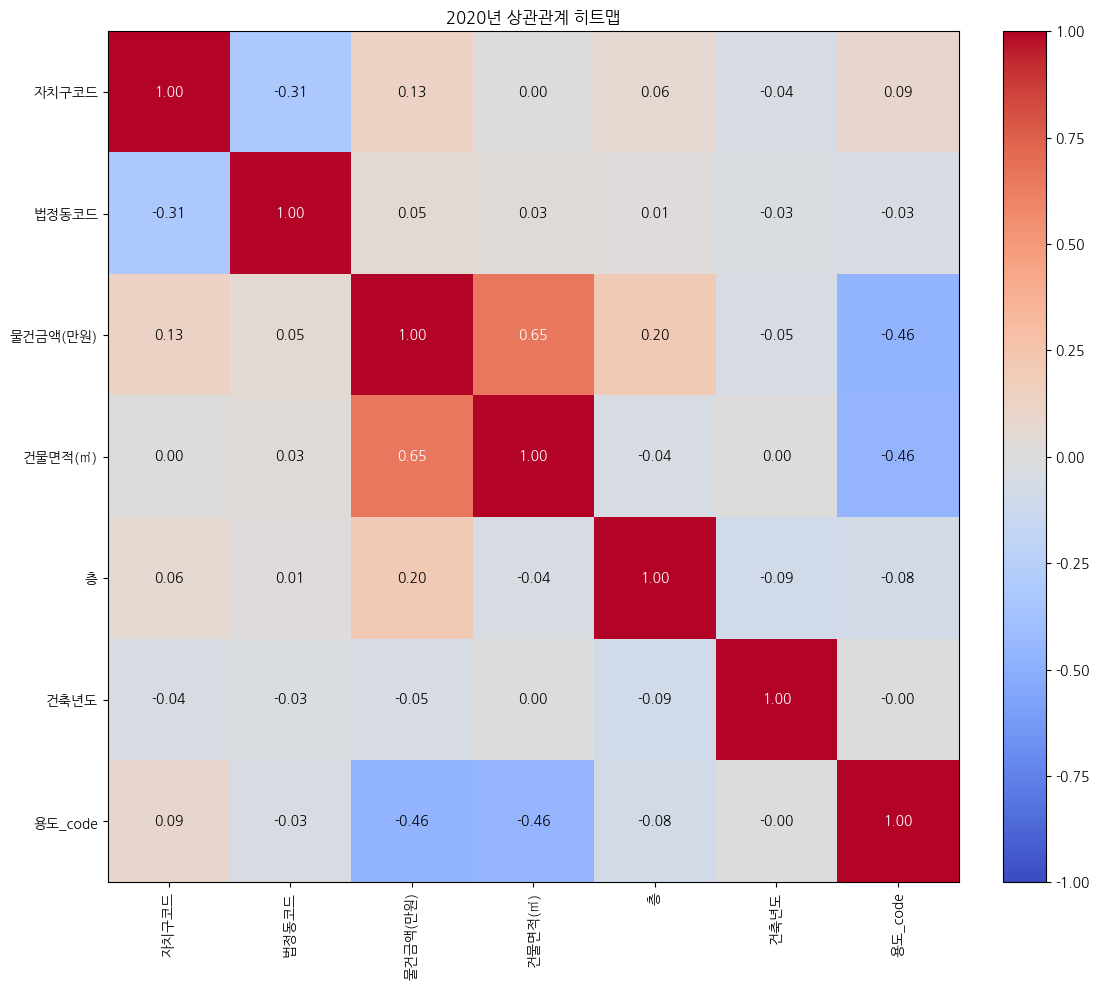

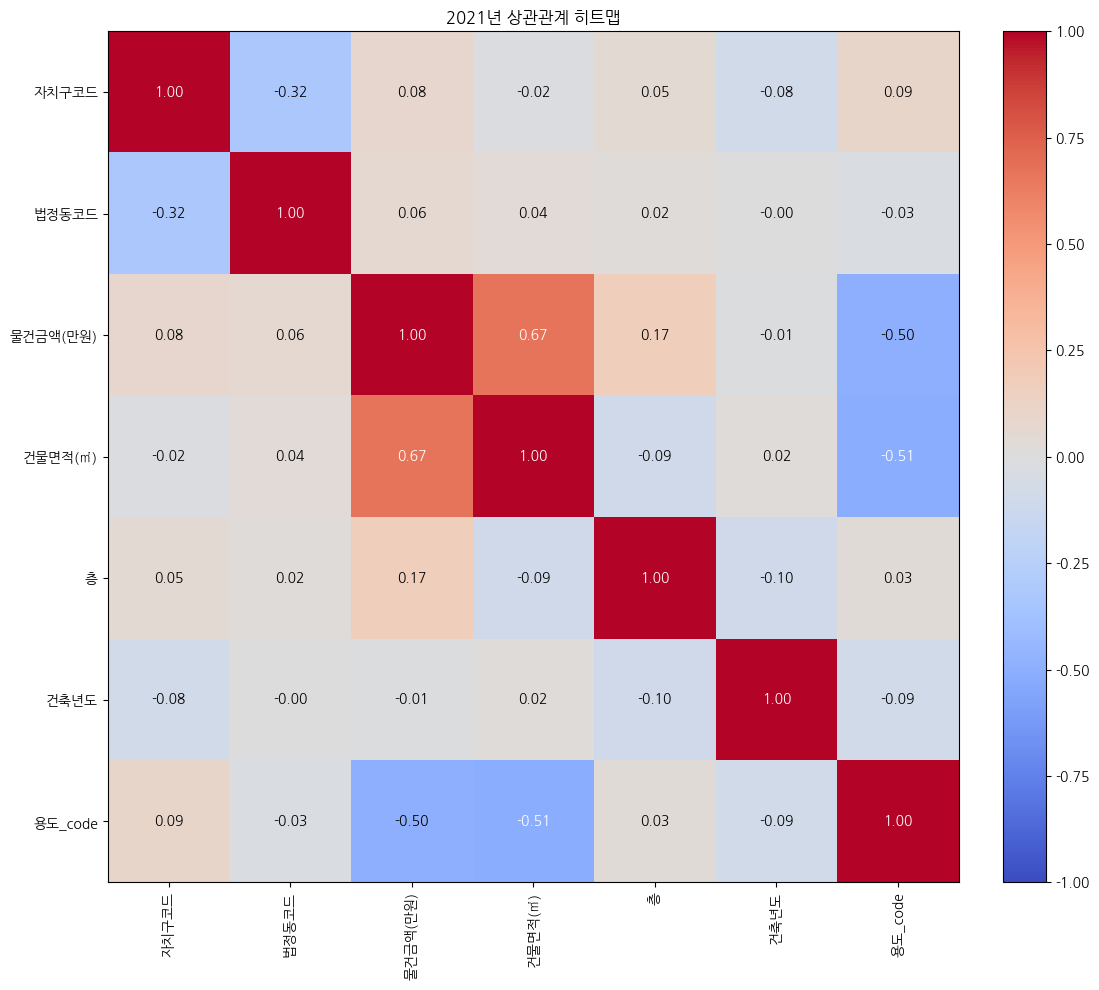

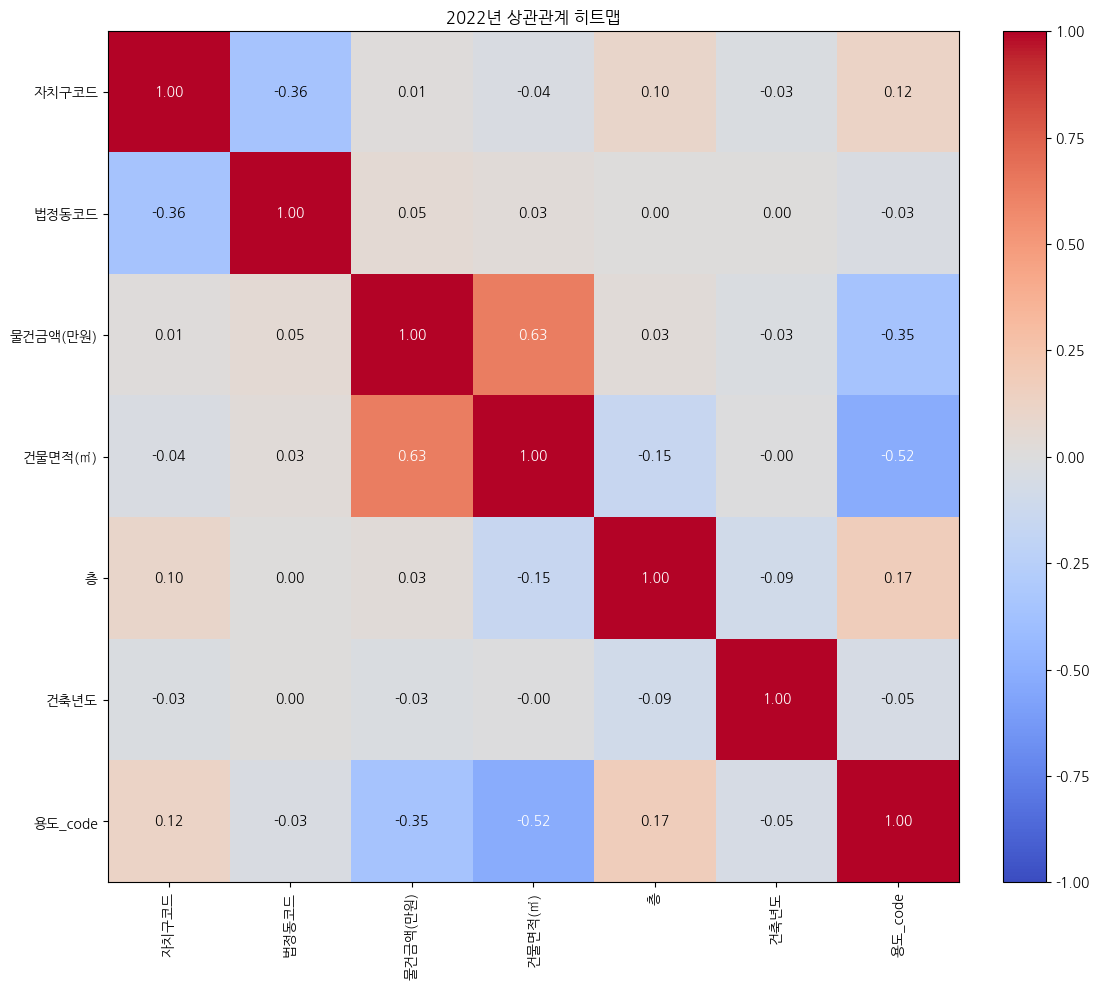

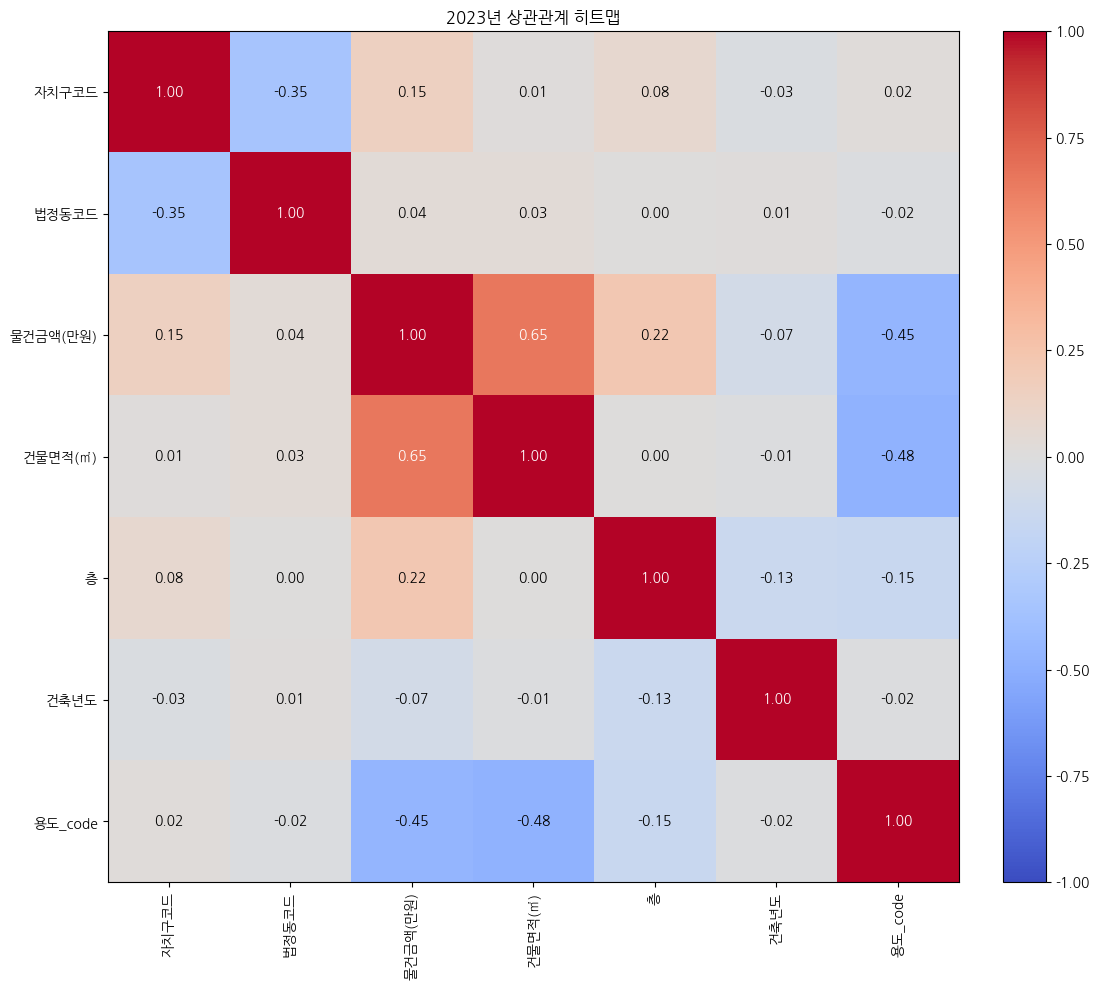

In [15]:
for year, df in dfs.items():
    corr = df[col_names].corr()

    fig, ax = plt.subplots(figsize=(12, 10))
    im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

    # 축 레이블
    ax.set_xticks(np.arange(len(col_names)))
    ax.set_yticks(np.arange(len(col_names)))
    ax.set_xticklabels(col_names, rotation=90)
    ax.set_yticklabels(col_names, rotation=0)

    # 셀마다 숫자 표시
    for i in range(len(col_names)):
        for j in range(len(col_names)):
            val = corr.iloc[i, j]
            ax.text(
                j, i,
                f"{val:.2f}",
                ha='center', va='center',
                color='white' if abs(val) > 0.5 else 'black'
            )

    # 컬러바, 타이틀
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_title(f"{year}년 상관관계 히트맵")
    plt.tight_layout()
    plt.show()

4.2 데이터 분석 2 : 교통 인프라(역 개수)와 주택 가격 간 상관관계 탐색

In [16]:
df_sub = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울교통공사_자치구별지하철역정보_20250317.CSV', encoding='cp949')
df_sub

,자치구,해당역(호선),역개수
0,강남구,"삼성(2), 선릉(2), 역삼(2), 강남(2), 압구정(3), 신사(3), 매봉(...",21
1,강동구,"천호(5), 강동(5), 길동(5), 굽은다리(5), 명일(5), 고덕(5), 상일...",15
2,강북구,"수유(4), 미아(4), 미아사거리(4)",3
3,강서구,"방화(5), 개화산(5), 김포공항(5), 송정(5), 마곡(5), 발산(5), 우...",9
4,관악구,"낙성대(2), 서울대입구(2), 봉천(2), 신림(2)",4
5,광진구,"건대입구(2), 구의(2), 강변(2), 군자(5), 아차산(5), 광나루(5), ...",11
6,구로구,"구로디지털단지(2), 대림(2), 신도림(2), 도림천(2), 남구로(7), 천왕(...",7
7,금천구,가산디지털단지(7),1
8,노원구,"불암산(4), 상계(4), 노원(4), 석계(6), 태릉입구(6), 화랑대(6), ...",13
9,도봉구,"창동(4), 쌍문(4), 도봉산(7)",3


In [17]:
dfsub = df_sub[['자치구','역개수']].copy()
dfsub

,자치구,역개수
0,강남구,21
1,강동구,15
2,강북구,3
3,강서구,9
4,관악구,4
5,광진구,11
6,구로구,7
7,금천구,1
8,노원구,13
9,도봉구,3


In [18]:
target_names = [
    "고덕동", "상일동", "강일동", "상계동", "논현동", "신사동",
    "서초동", "역삼동", "여의도동", "대방동", "서림동", "신림동"
]

# 2) df20~df23에서 해당 동명만 남겨 새로운 DataFrame으로 저장
df_dong20 = df20[df20['법정동명'].isin(target_names)].copy()
df_dong21 = df21[df21['법정동명'].isin(target_names)].copy()
df_dong22 = df22[df22['법정동명'].isin(target_names)].copy()
df_dong23 = df23[df23['법정동명'].isin(target_names)].copy()

df_dong20.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,가격범위,용도_code
48,2020,11650,서초구,10800,서초동,1.0,대지,1514,6.0,옥스포드빌라트,...,0.00,6.0,NaN,NaN,2003.0,아파트,NaN,NaN,2,1
57,2020,11350,노원구,10500,상계동,1.0,대지,0071,183.0,불암빌라,...,21.99,2.0,NaN,NaN,1991.0,연립다세대,NaN,NaN,3,2
61,2020,11680,강남구,10100,역삼동,1.0,대지,0763,16.0,래미안그레이튼,...,0.00,19.0,NaN,NaN,2009.0,아파트,NaN,NaN,2,1
69,2020,11560,영등포구,11000,여의도동,1.0,대지,0048,0.0,대우트럼프월드II,...,NaN,32.0,NaN,NaN,2003.0,아파트,NaN,NaN,2,1
84,2020,11740,강동구,11000,강일동,1.0,대지,0676,1.0,강일 테라우드,...,75.16,5.0,NaN,NaN,2019.0,오피스텔,NaN,NaN,2,3


In [19]:
# 그룹별로 포함할 법정동명 리스트 정의 (번호 1~7)
groups = { #df(연도)_(번호) 별로 들어갈 열 설정
    1: ["고덕동", "상일동"],
    2: ["강일동", "상일동"],
    3: ["상계동"],
    4: ["논현동", "신사동"],
    5: ["서초동", "역삼동"],
    6: ["여의도동", "대방동"],
    7: ["서림동", "신림동"]
}

# 연도별 원본 df_dong 변수명을 숫자 20,21,22,23에 매핑
dfs = {
    20: df_dong20,
    21: df_dong21,
    22: df_dong22,
    23: df_dong23
}

# 각 그룹번호(i)와 연도(year) 조합으로 새 변수 생성
for year, df_year in dfs.items():
    for i, dong_list in groups.items():
        # 해당 연도·그룹의 데이터만 필터링
        filtered = df_year[df_year['법정동명'].isin(dong_list)].copy()

        # 예: year=20, i=1 → 변수명 "df20_1"
        var_name = f"df{year}_{i}"
        globals()[var_name] = filtered

df21_4.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,가격범위,용도_code
14,2021,11680,강남구,10800,논현동,1.0,대지,28.0,17.0,논현아테나니케,...,86.54,2.0,NaN,NaN,2004.0,연립다세대,중개거래,서울 강남구,3,2
19,2021,11380,은평구,10900,신사동,1.0,대지,1.0,54.0,미모아블루빌,...,13.86,5.0,NaN,NaN,2015.0,연립다세대,직거래,NaN,3,2
374,2021,11380,은평구,10900,신사동,1.0,대지,200.0,68.0,성진빌타(200-68),...,17.92,3.0,NaN,NaN,2003.0,연립다세대,중개거래,서울 은평구,3,2
407,2021,11380,은평구,10900,신사동,1.0,대지,208.0,8.0,(208-8),...,27.50,3.0,NaN,NaN,1986.0,연립다세대,중개거래,서울 은평구,3,2
607,2021,11380,은평구,10900,신사동,1.0,대지,184.0,22.0,호명펠리스,...,25.94,2.0,NaN,20220624.0,2021.0,연립다세대,직거래,NaN,2,2


In [20]:
groups = [1, 2, 3, 4, 5, 6, 7]

years = [20, 21, 22, 23]

# 각 그룹별 연도별 평균 가격을 저장할 딕셔너리
group_avg_prices = {}

for grp in groups:
    avg_prices = []
    for yr in years:
        # 동적 변수 이름으로 DataFrame 가져오기
        df_var = globals().get(f"df{yr}_{grp}")
        if df_var is not None and not df_var.empty:
            avg_prices.append(df_var['물건금액(만원)'].mean())
        else:
            avg_prices.append(float('nan'))  # 데이터가 없으면 NaN
    group_avg_prices[grp] = avg_prices

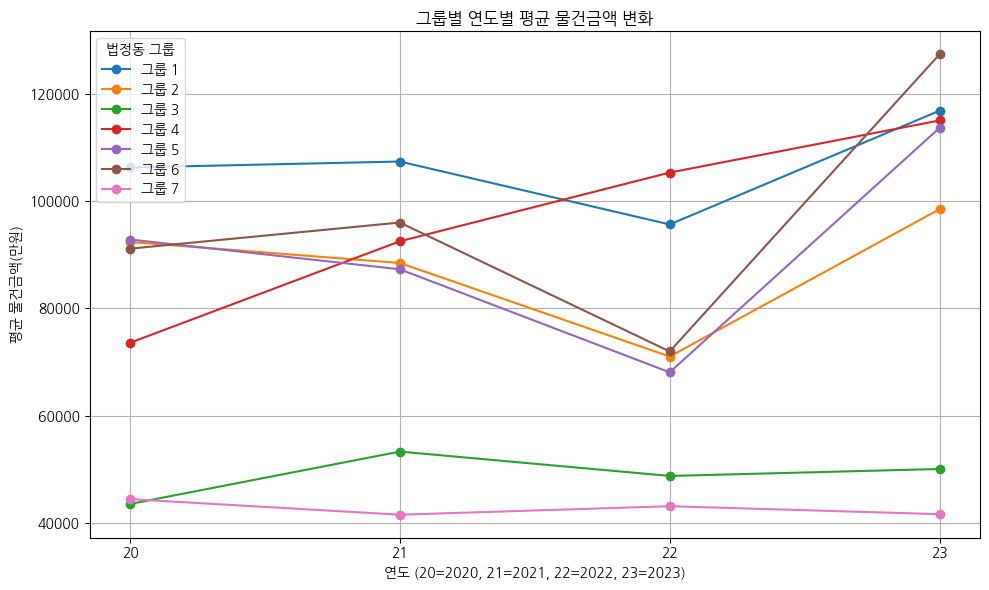

In [21]:
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
for grp, prices in group_avg_prices.items():
    plt.plot(years, prices, marker='o', label=f"그룹 {grp}")

plt.xlabel("연도 (20=2020, 21=2021, 22=2022, 23=2023)")
plt.ylabel("평균 물건금액(만원)")
plt.title("그룹별 연도별 평균 물건금액 변화")
plt.xticks(years, [str(y) for y in years])
plt.legend(title="법정동 그룹")
plt.grid(True)
plt.tight_layout()
plt.show()


<b>그룹에 들어있는 행정동명<br><br>

<b>상일동 ~ 하남풍산 구간 2020년 8월 8일</b><br>
그룹1: 고덕동, 상일동 - 상일동역 개통<br>
그룹2: 강일동, 상일동 - 강일역 개통<br><br>

<b>진접 ~ 당고개 구간 2022년 3월 19일</b><br>
그룹3: 상계동 - 당고개역 개통<br><br>

<b>신사 ~ 강남 구간 2022년 5월 28일</b><br>
그룹4: 논현동, 신사동 - 신사역<br>
그룹5: 서초동, 역삼동 - 강남역<br><br>

<b>샛강 ~ 관악산 구간 2022년 5월 28일</b><br>
그룹6: 여의도동, 대방동 - 샛강역<br>
그룹7: 서림동, 신림동 - 관악산역<br><br>

이전 서울 전체 부동산 가격 흐름도를 보았을 때 22년도에 잠시 감소하는 추이가 있었고, 그것을 감안하여 보았을 때 전체적인 흐름상으론 증가하는 모습을 보였습니다.
이외의 지역의 이상치의 원인 분석은 아래와 같습니다.

그룹3은 서울 외곽에 위치하고 상계동의 경계가 너무 넓기에 역 근처만 분석하는 것에 어려움이 있었습니다.
그룹4는 강남을 관통하는 지하철 노선의 특성때문에 강남의 확대라는 인식이 꾸준한 가격의 상승 원인이라 생각됩니다. 따라서 해당 지역은 이미노선이 발표되었을 때부터 꾸준히 올라가고 있는 것이라 생각됩니다.
그룹6은 전체적인 부동산 하락세와 상관없이 감소도 되지않고 역 개통에 따른 상승 효과도 없기에 이 일대 가격은 다른 요소에 영향을 받는다고 생각됩니다.

In [22]:
# 자치구 번호 배정
station_count = {
    "강남구": 21, "강동구": 15, "강북구": 3,  "강서구": 9,  "관악구": 4,
    "광진구": 11, "구로구": 7,  "금천구": 1,  "노원구": 13, "도봉구": 3,
    "동대문구": 6, "동작구": 12, "마포구": 16, "서대문구": 5,  "서초구": 12,
    "성동구": 14, "성북구": 9,  "송파구": 28, "양천구": 5,  "영등포구": 11,
    "용산구": 10, "은평구": 13, "종로구": 15, "중구": 23,   "중랑구": 8
}

# 각 구별 평균 물건금액 계산
avg_price_by_gu = {}
for gu, df_gu in dfs_gu.items():
    # '물건금액(만원)' 컬럼의 평균을 구해서 dict에 저장
    avg_price_by_gu[gu] = df_gu['물건금액(만원)'].mean()

# station_count와 avg_price_by_gu를 DataFrame으로 합치기
df_compare = pd.DataFrame({
    '자치구': list(station_count.keys()),
    '역개수': list(station_count.values()),
    '평균물건금액': [avg_price_by_gu.get(gu, float('nan')) for gu in station_count.keys()]
})

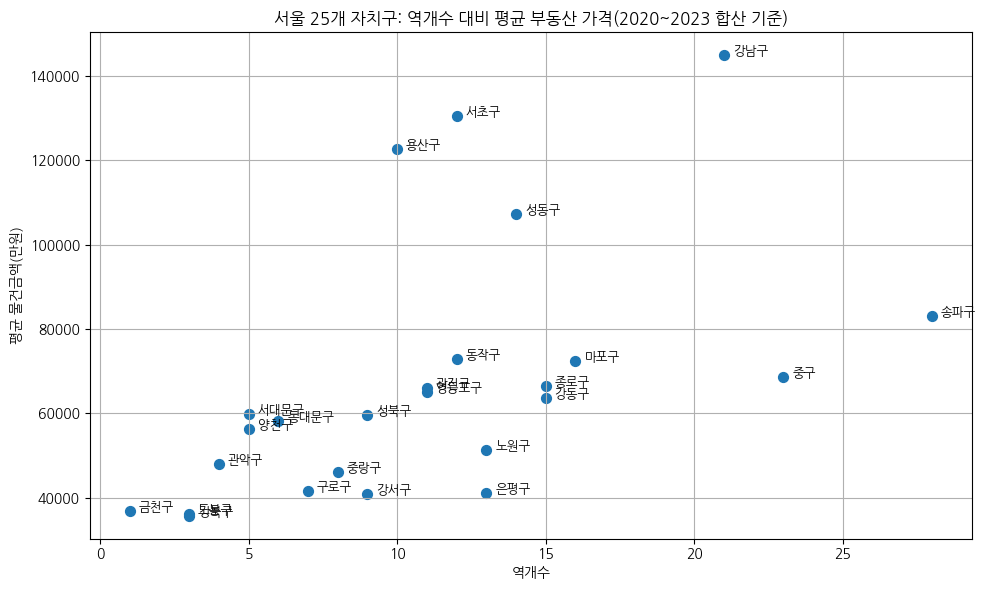

In [23]:
# 6) 산점도 그리기 (역개수 vs 평균물건금액)
plt.figure(figsize=(10, 6))
plt.scatter(df_compare['역개수'], df_compare['평균물건금액'], s=50)

# 각 점에 자치구명 레이블 추가
for i, row in df_compare.iterrows():
    plt.text(
        row['역개수'] + 0.3,      # x-offset을 줘서 글자가 점에 겹치지 않도록
        row['평균물건금액'],
        row['자치구'],
        fontsize=9
    )

plt.xlabel("역개수")
plt.ylabel("평균 물건금액(만원)")
plt.title("서울 25개 자치구: 역개수 대비 평균 부동산 가격(2020~2023 합산 기준)")
plt.grid(True)
plt.tight_layout()
plt.show()


전반적으로 역 개수의 증가 -> 평균 가격 상승으로 이어지고있습니다. <br><br>
왼쪽의 구를 보면 금천구(역 1개)가 약 3,800만 원, 도봉구(역 3개)가 약 3,500만 원, 강북구(역 3개)가 약 3,600만 원 대와 같이 상대적으로 낮은 평균 가격을 형성합니다.<br><br>
반대로 역이 많은 오른쪽을 보면 송파구(역 28개)는 평균 약 8,300만 원, 중구(역 23개)는 약 6,800만 원, 강남구(역 21개)는 약 14만 5,000만 원 등으로 전반적으로 가격이 상승합니다.<br><br>
따라서 구 내의 역 갯수는 자치구의 부동산 가격과 양의 상관관계가 있다고 볼 수 있습니다.

4.3 데이터 분석 3 : 서울시 자치구별 범죄 발생 수와 부동산 실거래가의 상관관계 분석

In [24]:
import pandas as pd  # 데이터프레임(표 형태 데이터) 처리 및 분석을 위한 라이브러리
import seaborn as sns  # 통계적 데이터 시각화 라이브러리 (히트맵 등)
import matplotlib.pyplot as plt  # 그래프 및 차트 시각화 라이브러리
from sklearn.linear_model import LinearRegression  # 선형회귀 모델 클래스
from sklearn.model_selection import train_test_split  # 데이터 분할(학습/테스트) 함수
from sklearn.metrics import r2_score  # 회귀분석의 결정계수(R^2) 계산 함수
from sklearn.metrics import mean_absolute_error

## 목적
CSV 파일에서 서울의 각 자치구별, 연도별 범죄 정보를 추출하고, 데이터 분석에 적합하도록 데이터를 정제하고 전처리하는 단계입니다.

In [26]:
# 1. 범죄 데이터 CSV 불러오기 및 불필요한 헤더 제거
crime_raw = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/5대+범죄+발생현황_20250408153002.csv')

# 2. 실제 데이터가 시작되는 3번째 줄부터 사용
crime = crime_raw.iloc[2:].copy()

# 3. 컬럼명 한글로 변경
crime.columns = ['자치구별', '2020', '2021', '2022', '2023']

# 4. 연도별 범죄 데이터를 숫자형으로 변환
for year in ['2020', '2021', '2022', '2023']:
    crime[year] = pd.to_numeric(crime[year], errors='coerce')

# 5. '소계' 행(전체 합계) 제거
crime = crime[crime['자치구별'] != '소계'].reset_index(drop=True)
crime.head()

,자치구별,2020,2021,2022,2023
0,종로구,3102,2712,3138,2981
1,중구,3411,2861,3071,3348
2,용산구,2969,2381,2967,3021
3,성동구,2362,2112,2194,2023
4,광진구,3601,3087,3619,3424


In [29]:
#  연도별 부동산 실거래가 데이터 불러오기
#    (각 연도별로 별도의 CSV 파일)
data2020 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2020).csv', encoding='cp949')
data2021 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2021).csv', encoding='cp949')
data2022 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2022).csv', encoding='cp949')
data2023 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2023).csv', encoding='cp949')
data2024 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2024).csv', encoding='cp949')


<ipython-input-29-abf1355d04a7>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2020 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2020).csv', encoding='cp949')
<ipython-input-29-abf1355d04a7>:4: DtypeWarning: Columns (7,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data2021 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2021).csv', encoding='cp949')


이 코드는 서울시의 각 자치구별 평균 부동산 가격을 산출하는 함수로 설계되었습니다. 특정 구에 속한 부동산 데이터(아파트 가격 등)를 수집하여 해당 지역의 평균값을 계산하는 알고리즘을 포함하고 있습니다.

In [30]:
# 자치구별 평균 부동산 금액 계산 함수 정의
def Data(loc, moneys, year):
    i = 0
    money_aver = []
    n = 0
    for loca in crime['자치구별']:
        for locb, money in zip(loc, moneys):
            if loca in locb:
                i = i + money
                n = n + 1
        if i != 0 and n != 0:
            money_aver.append({
                "자치구별": loca,
                year: float(i / n)
            })
        i = 0
        n = 0
    return money_aver


해당 코드는 자치구별로 연도별 범죄 발생 건수 데이터와 평균 부동산 금액 데이터를 하나로 합치는(병합하는) 작업을 수행합니다. 이렇게 합쳐진 데이터를 바탕으로 분석에 사용될 최종 데이터프레임(DataFrame)을 만드는 전체 과정을 설명하고 있습니다.

즉, 이 코드는 서로 다른 두 종류의 데이터를 통합하여 분석 준비를 하는 데 목적이 있다고 할 수 있습니다.

In [31]:
# Convert '자치구명' column to string type
data2020['자치구명'] = data2020['자치구명'].astype(str)
data2021['자치구명'] = data2021['자치구명'].astype(str)
data2022['자치구명'] = data2022['자치구명'].astype(str)
data2023['자치구명'] = data2023['자치구명'].astype(str)
data2024['자치구명'] = data2024['자치구명'].astype(str)

# 각 연도별 자치구별 평균 부동산 금액 데이터 생성
data2020_df = pd.DataFrame(Data(loc=data2020['자치구명'], moneys=data2020['물건금액(만원)'], year="2020"))
data2021_df = pd.DataFrame(Data(loc=data2021['자치구명'], moneys=data2021['물건금액(만원)'], year="2021"))
data2022_df = pd.DataFrame(Data(loc=data2022['자치구명'], moneys=data2022['물건금액(만원)'], year="2022"))
data2023_df = pd.DataFrame(Data(loc=data2023['자치구명'], moneys=data2023['물건금액(만원)'], year="2023"))
# 2024년도 실제 아파트값
data2024_df = pd.DataFrame(Data(loc=data2024['자치구명'], moneys=data2024['물건금액(만원)'], year="2024"))

# 9. 연도별 부동산 금액 데이터 병합 (자치구별 기준)
money_merged = data2020_df.merge(data2021_df, on='자치구별', how='outer') \
                    .merge(data2022_df, on='자치구별', how='outer') \
                    .merge(data2023_df, on='자치구별', how='outer') \
                    .merge(data2024_df, on='자치구별', how='outer')

# 10. 범죄 데이터와 부동산 금액 데이터 병합
def_df = crime.merge(money_merged, left_on='자치구별', right_on='자치구별', how='left')
# 11. 컬럼명 명확하게 변경 (연도_범죄, 연도_금액)
final_df = def_df.rename(columns={
    '2020_x': '2020_범죄', '2021_x': '2021_범죄', '2022_x': '2022_범죄', '2023_x': '2023_범죄',
    '2020_y': '2020_금액', '2021_y': '2021_금액', '2022_y': '2022_금액', '2023_y': '2023_금액',
    '2024': '2024_금액'
})
final_df.head()

,자치구별,2020_범죄,2021_범죄,2022_범죄,2023_범죄,2020_금액,2021_금액,2022_금액,2023_금액,2024_금액
0,종로구,3102,2712,3138,2981,62523.596117,69175.885367,61247.192581,75491.209967,75407.091667
1,중구,3411,2861,3071,3348,72956.132610,69838.717727,51550.518164,75040.169972,89835.189961
2,용산구,2969,2381,2967,3021,108495.589031,110899.175398,162619.324105,152903.775372,161886.036729
3,성동구,2362,2112,2194,2023,102406.959842,106179.459897,121037.240819,110348.125312,131899.901015
4,광진구,3601,3087,3619,3424,64873.940286,65594.909446,64311.463698,70894.285781,82668.717591


이 코드는 서울시의 각 자치구에서 발생한 범죄 건수와 해당 지역의 부동산 평균 가격 간의 관계를 시각적으로 보여주도록 설계되었습니다.

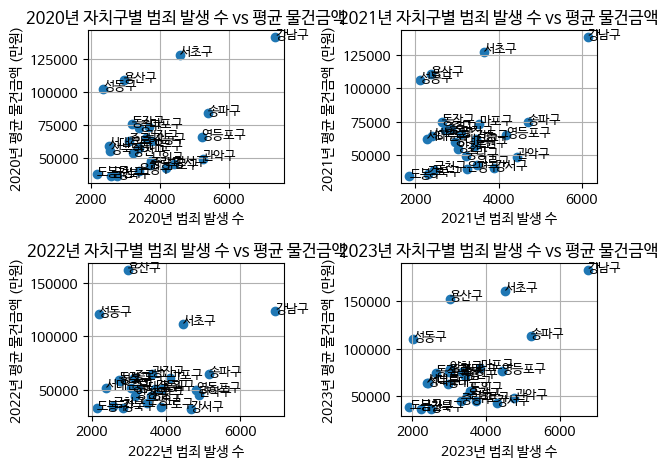

In [34]:
# 이 설정으로 그래프 축/텍스트에 한글이 제대로 표시되고, - 부호도 정상 출력됩니다.
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# final_df에서 인덱스를 리셋하여 순수한 숫자 인덱스의 DataFrame df 생성
df = final_df.reset_index()
# 분석 대상 연도 목록 정의
years = ['2020', '2021', '2022', '2023']
# 반복문을 통해 2x2 서브플롯에 연도별 그래프 생성
for i, year in enumerate(years):
    # 2행 2열 subplot을 생성해 4개 연도 그래프를 하나의 창에 그립니다.
	# i는 03, 각각의 subplot(2, 2, i+1)으로 14번째 위치에 그림
    plt.subplot(2, 2, i + 1)
    # 각 연도에 대해 산점도 그리고 자치구 이름 표시
    x = df[f'{year}_범죄']  # x: 해당 연도의 범죄 수
    y = df[f'{year}_금액']  # y: 해당 연도의 부동산 평균 금액
    plt.scatter(x, y)
    # 자치구 이름 표시
    for j in range(len(df)):
        plt.text(x[j], y[j], df['자치구별'][j], fontsize=9)

    # 축 레이블 및 제목 설정
    plt.xlabel(f'{year}년 범죄 발생 수')
    plt.ylabel(f'{year}년 평균 물건금액 (만원)')
    plt.title(f'{year}년 자치구별 범죄 발생 수 vs 평균 물건금액')
    plt.grid(True)
# 레이아웃 조정 및 출력
plt.tight_layout()    # tight_layout()은 서브플롯 간 여백 자동 조정
plt.show()            # show()로 그래프 출력


## 출력 그래프 구성

2행 2열의 산점도: 각 연도(2020~2023)에 대해

x축: 자치구별 범죄 발생 수

y축: 자치구별 평균 부동산 금액

각 점에는 자치구 이름이 표시됨

## 연도별 상관계수 출력
서울시 자치구별 범죄 발생 수와 평균 부동산 금액 간의 연도별 상관관계(피어슨 상관계수)를 계산해 출력합니다

In [35]:
# 연도별 상관계수 출력
for year in years:
    corr = df[f'{year}_범죄'].corr(df[f'{year}_금액'])
    print(f"{year}년 상관계수 (범죄 수 vs 평균 물건금액): {corr:.3f}")


2020년 상관계수 (범죄 수 vs 평균 물건금액): 0.459
2021년 상관계수 (범죄 수 vs 평균 물건금액): 0.340
2022년 상관계수 (범죄 수 vs 평균 물건금액): 0.182
2023년 상관계수 (범죄 수 vs 평균 물건금액): 0.511


상관계수가 음수이면, 범죄 수가 많을수록 부동산 금액이 낮은 경향이 있음을 의미합니다. (단, 상관계수가 -0.3 이하면 약한 음의 상관관계 수준)

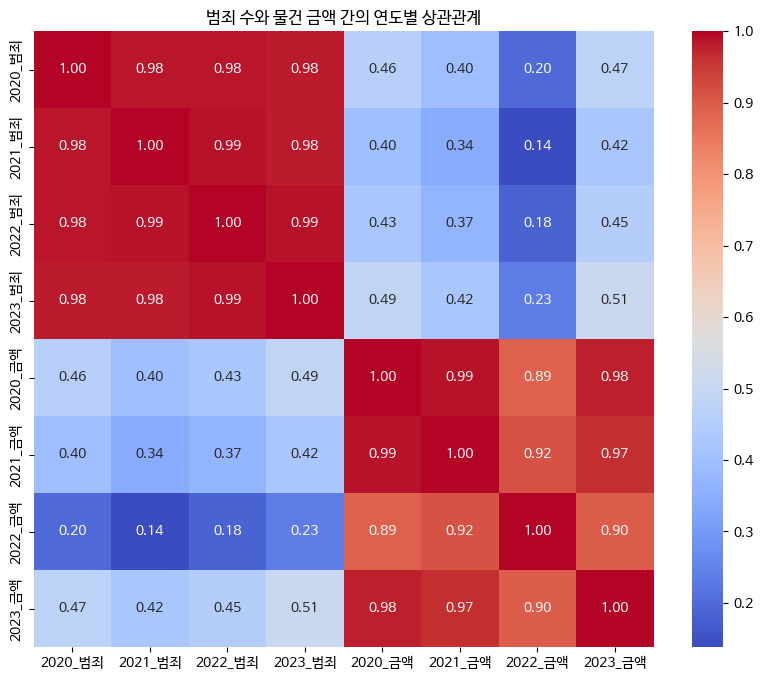

In [36]:
# 1. 분석에 필요한 열만 선택
# 범죄 수와 금액 데이터를 하나의 데이터프레임으로 묶습니다.
cor_df = df[[f'{y}_범죄' for y in years] + [f'{y}_금액' for y in years]]
# 2. 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
sns.heatmap(cor_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("범죄 수와 물건 금액 간의 연도별 상관관계")
plt.show()


같은 연도끼리의 '2023_범죄' vs '2023_금액' 상관계수가 핵심입니다.
좌측 상단↘우측 하단 대각선은 자기 자신과의 상관이므로 항상 1.00입니다.
대각선 근처의 서로 다른 항목들 간 상관을 해석하세요.

## 전체 데이터를 long-form으로 변환하여 단일 회귀분석
연도별로 분리되어 있는 범죄 수와 부동산 금액 데이터를 하나의 긴(long-form) 형태로 변환하여, 전체 데이터를 기반으로 단일 회귀분석을 할 수 있도록 준비하는 과정입니다.

In [37]:
# 전체 데이터를 long-form으로 변환하여 단일 회귀분석
long_df = pd.DataFrame({
    '범죄': pd.concat([df[f'{y}_범죄'] for y in years], ignore_index=True),
    '금액': pd.concat([df[f'{y}_금액'] for y in years], ignore_index=True)
})
long_df.head()

,범죄,금액
0,3102,62523.596117
1,3411,72956.132610
2,2969,108495.589031
3,2362,102406.959842
4,3601,64873.940286


## 전체 데이터로 단일 선형회귀 모델 학습 및 결과 시각화
2020~2023년의 자치구별 데이터를 모두 합쳐서
범죄 발생 수와 평균 부동산 금액 간의 단일 선형 회귀분석과 상관계수 계산을 수행합니다.

In [38]:
X_all = long_df[['범죄']].values # 범죄 → 입력값 (X)
Y_all = long_df['금액'].values   # 금액 → 출력값 (Y)

# LinearRegression() 객체를 생성하여 X_all과 Y_all로 학습시킴
model = LinearRegression()
model.fit(X_all, Y_all)

# 학습된 모델로 예측값 Y_pred_all 생성
Y_pred_all = model.predict(X_all)

# R²: 예측이 실제 값을 얼마나 잘 설명하는지 (1에 가까울수록 좋음)
r2_all = r2_score(Y_all, Y_pred_all)
# 회귀계수: 범죄 수가 1 증가할 때 금액이 얼마나 변하는지
coef_all = model.coef_[0]
# 절편: 범죄 = 0일 때의 예측 금액
intercept_all = model.intercept_
# -1 ≤ 상관계수 ≤ 1
# 1: 완전 양의 상관관계
# -1: 완전 음의 상관관계
# 0: 상관 없음
corr_all = long_df['범죄'].corr(long_df['금액'])
print(f"전체 데이터 회귀계수(기울기): {coef_all:.3f}, 절편: {intercept_all:.3f}, 결정계수(R²): {r2_all:.3f}, 상관계수: {corr_all:.3f}")


전체 데이터 회귀계수(기울기): 10.609, 절편: 30444.627, 결정계수(R²): 0.127, 상관계수: 0.356


## 전체 데이터를 기반으로 선형 회귀 분석 결과를 시각화하는 그래프


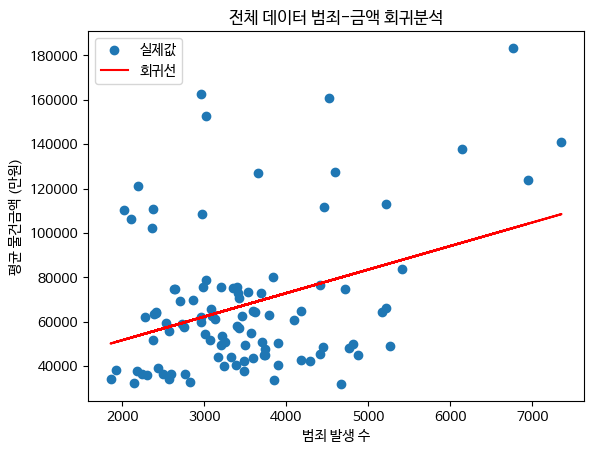

In [39]:
# 산점도 (실제 데이터)
# X축: 범죄 발생 수
# Y축: 평균 물건금액 (만원)
# 자치구/연도별 실제 데이터 점들을 찍음
plt.scatter(X_all, Y_all, label='실제값')
# 회귀선 (예측 값)
# 학습된 선형 회귀 모델이 예측한 Y_pred_all 값을 선형으로 그림
plt.plot(X_all, Y_pred_all, color='red', label='회귀선')
# 그래프 꾸미기
plt.xlabel('범죄 발생 수')
plt.ylabel('평균 물건금액 (만원)')
plt.title('전체 데이터 범죄-금액 회귀분석')
plt.legend()
plt.show()

그래프의 점(●): 실제 자치구의 범죄 발생 수와 평균 부동산 금액

빨간 선(―): 선형 회귀 모델이 예측한 결과를 시각화한 회귀 직선

회귀선이 데이터에 얼마나 잘 맞는지를 시각적으로 확인 가능

## 2023년 범죄 데이터를 기반으로 회귀모델을 만들고, 2024년 범죄 수(2023년과 동일)를 입력하여 2024년 금액을 예측
2024년 평균 물건금액(부동산 금액)을 예측합니다

In [40]:
# X_2023: 2023년 자치구별 범죄 발생 수 (입력값, feature)
X_2023 = df[['2023_범죄']].values
# Y_2023: 2023년 자치구별 평균 부동산 금액 (목표값, target)
Y_2023 = df['2023_금액'].values

# 2023년 데이터를 기반으로 선형 회귀 모델 학습
model_2023 = LinearRegression()
model_2023.fit(X_2023, Y_2023)

# 2024년 범죄 수를 2023년과 동일하다고 가정하여 예측
X_2024 = df[['2023_범죄']].values
# 해당 범죄 수에 대해 2024년의 평균 물건금액을 회귀 모델로 예측
Y_2024_pred = model_2023.predict(X_2024)
# Y_2024_pred: 각 자치구별로 2023년과 같은 범죄 수준일 때 예상되는 2024년 평균 부동산 금액
# 회귀 모델은 2023년 데이터에 기반하므로, 이는 단순한 선형 예측이며 외부 요인(정책, 경기 등)은 반영하지 않습니다.
Y_2024_pred

array([ 67988.01393032,  74671.56056068,  68716.46587913,  50541.58975626,
        76055.61926342,  67550.94276103,  74234.48939139,  57607.57365974,
        59173.74534969,  48684.03728678,  78659.83498043,  77312.19887512,
        57134.07989301,  83522.25173875,  68680.04328169,  91935.87174754,
        81755.75576288,  54493.44157857,  94157.65019142,  61814.38366413,
       100549.81604225,  96051.62525833, 136863.14569056, 108817.74566127,
        75582.12549669])

## 2023년 실제 금액과 2024년 예측 금액을 바 차트로 비교 시각화
2023년 실제 평균 물건금액과 2024년 예측 평균 물건금액을 자치구별로 비교하는 막대 그래프를 출력합니다.

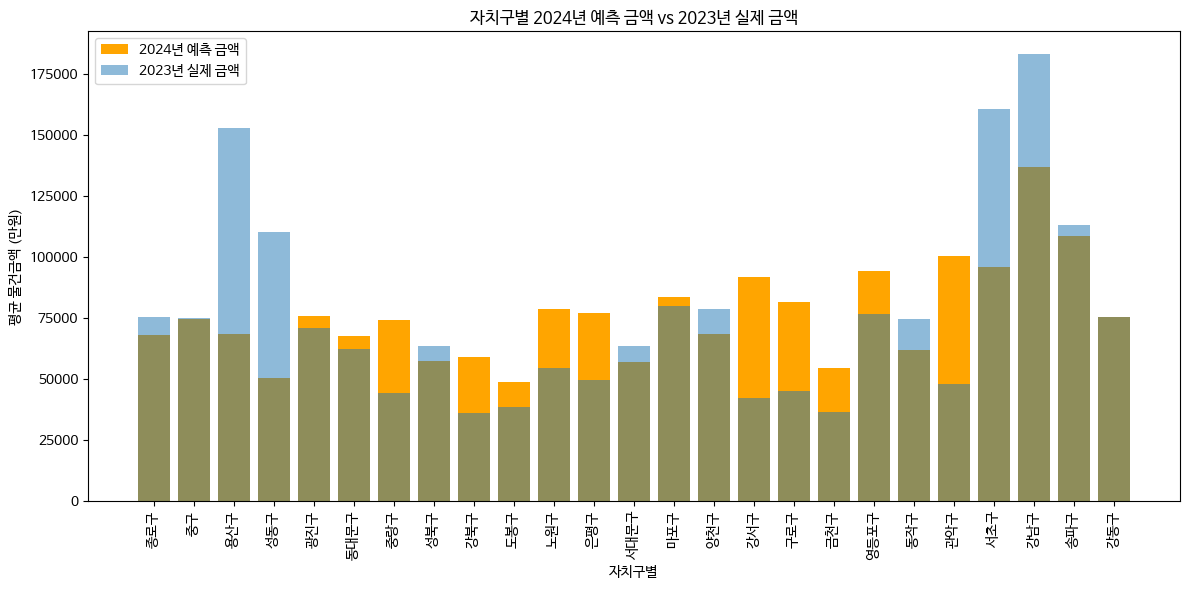

In [41]:
# 그래프 전체 크기를 가로 12, 세로 6 인치로 설정
plt.figure(figsize=(12, 6))
# 첫 번째 막대: 2024년 예측 금액 (주황색)
plt.bar(df['자치구별'], Y_2024_pred, color='orange', label='2024년 예측 금액')

# 두 번째 막대: 2023년 실제 금액 (반투명 회색 또는 기본 색)
plt.bar(df['자치구별'], df['2023_금액'], alpha=0.5, label='2023년 실제 금액')
# x축: 자치구 이름 (90도 회전)
plt.xlabel('자치구별')
# y축: 평균 물건금액
plt.ylabel('평균 물건금액 (만원)')
plt.title('자치구별 2024년 예측 금액 vs 2023년 실제 금액')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## 2024년 실제 금액과 2024년 예측 금액을 비교 분석


2024년 예측 vs 실제 금액 결정계수(R²): 0.208
2024년 예측 vs 실제 금액 평균 절대 오차 (MAE): 27738.418 만원


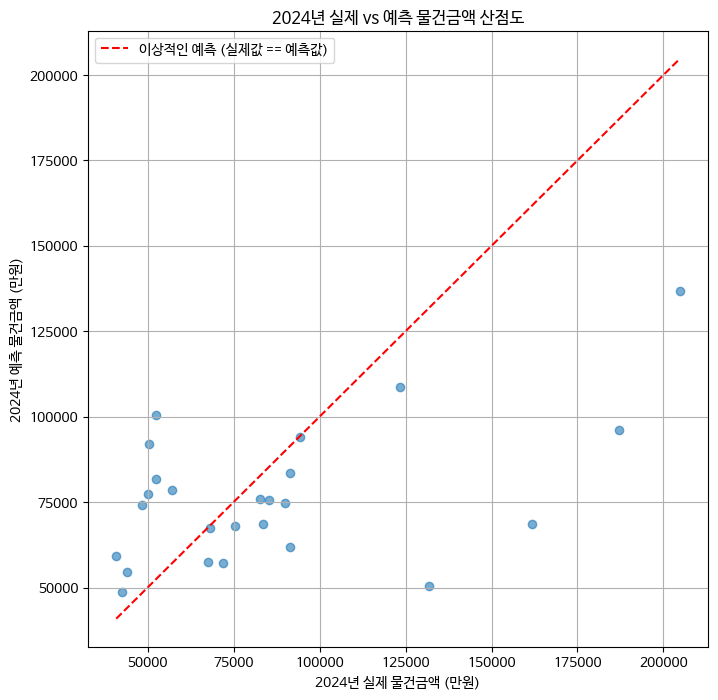

In [42]:
# 2024년 예측값과 실제값에 대한 결정계수(R²) 계산
# R² 계산 전에 실제 2024년 데이터의 결측치(NaN)를 처리해야 함
# 실제값 또는 예측값에 결측치가 있는 행 제거
comparison_df = pd.DataFrame({'actual': df['2024_금액'], 'predicted': Y_2024_pred.flatten()})
comparison_df = comparison_df.dropna()
comparison_df


if not comparison_df.empty:
    r2_2024 = r2_score(comparison_df['actual'], comparison_df['predicted'])
    print(f"\n2024년 예측 vs 실제 금액 결정계수(R²): {r2_2024:.3f}")

    # 평균 절대 오차 (MAE) 계산
    mae_2024 = mean_absolute_error(comparison_df['actual'], comparison_df['predicted'])
    print(f"2024년 예측 vs 실제 금액 평균 절대 오차 (MAE): {mae_2024:.3f} 만원")

    # 실제값 vs 예측값 산점도 생성
    plt.figure(figsize=(8, 8))
    plt.scatter(comparison_df['actual'], comparison_df['predicted'], alpha=0.6)
    # 완벽한 예측을 나타내는 대각선 추가 (실제값 == 예측값)
    plt.plot([comparison_df['actual'].min(), comparison_df['actual'].max()],
             [comparison_df['actual'].min(), comparison_df['actual'].max()],
             'r--', label='이상적인 예측 (실제값 == 예측값)')
    plt.xlabel('2024년 실제 물건금액 (만원)')
    plt.ylabel('2024년 예측 물건금액 (만원)')
    plt.title('2024년 실제 vs 예측 물건금액 산점도')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("2024년 실제 금액 데이터가 부족하여 R² 및 MAE를 계산하거나 산점도를 그릴 수 없습니다.")


## 2024년 실제 금액과 2024년 예측 금액을 바 차트로 비교 시각화

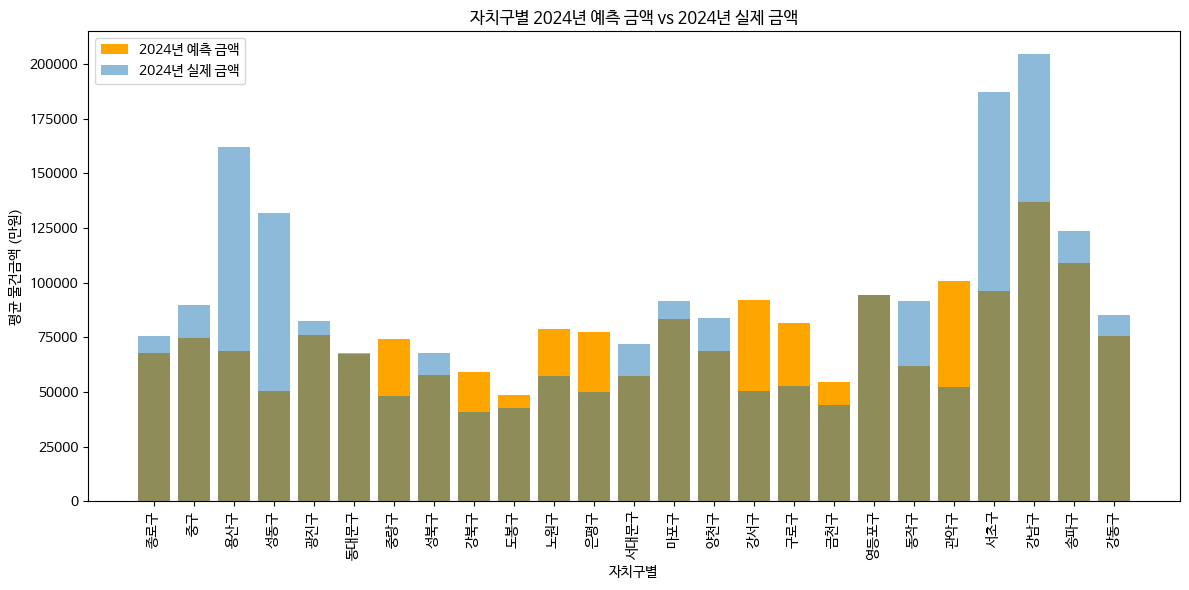

In [43]:

plt.figure(figsize=(12, 6))
plt.bar(df['자치구별'], Y_2024_pred, color='orange', label='2024년 예측 금액')
plt.bar(df['자치구별'], df['2024_금액'], alpha=0.5, label='2024년 실제 금액')
plt.xlabel('자치구별')
plt.ylabel('평균 물건금액 (만원)')
plt.title('자치구별 2024년 예측 금액 vs 2024년 실제 금액')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

4.4 데이터 분석 4 : # 서울시 인구 및 부동산 실거래가 데이터 분석  (2020–2023)

## 1. 라이브러리 임포트

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # 막대 그래프 값 표시를 위한 numpy 임포트


데이터 분석 및 시각화를 위한 기본 라이브러리들을 불러옵니다.

In [ ]:
## 2. 데이터 불러오기

In [48]:
# ===== 1. 데이터 로딩 =====
# 인구 데이터 로드
file_path = '/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/월별+인구추이(등록인구)_20250408091706.csv'
df = pd.read_csv(file_path)

# 부동산 실거래가 데이터 로드 (2020-2023)
df1 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2023).csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2022).csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2021).csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2020).csv', encoding='cp949')

# 대출금리 데이터 로드
df5 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/예금은행 대출금리(신규취급액 기준)_08141539.csv')

# 2021-2023년 대출금리 데이터만 선택
df5 = df5[['2021', '2022', '2023']]
df5

<ipython-input-48-be130380e71b>:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2020).csv', encoding='cp949')


,2021,2022,2023
0,2.88,4.29,5.19


각각 서울시 인구, 부동산 실거래가, 대출 금리 데이터를 pandas로 읽어옵니다.

In [49]:
# ===== 2. 데이터 전처리 =====
# 불필요한 '건축년도' 열 제거
df1 = df1.drop(columns=['건축년도'], errors='ignore')
df2 = df2.drop(columns=['건축년도'], errors='ignore')
df3 = df3.drop(columns=['건축년도'], errors='ignore')
df4 = df4.drop(columns=['건축년도'], errors='ignore')

# 물건금액을 숫자형으로 변환
df1['물건금액(만원)'] = pd.to_numeric(df1['물건금액(만원)'], errors='coerce')
df2['물건금액(만원)'] = pd.to_numeric(df2['물건금액(만원)'], errors='coerce')
df3['물건금액(만원)'] = pd.to_numeric(df3['물건금액(만원)'], errors='coerce')
df4['물건금액(만원)'] = pd.to_numeric(df4['물건금액(만원)'], errors='coerce')

# 결측값이 있는 행 제거
df1 = df1.dropna(subset=['물건금액(만원)'])
df2 = df2.dropna(subset=['물건금액(만원)'])
df3 = df3.dropna(subset=['물건금액(만원)'])
df4 = df4.dropna(subset=['물건금액(만원)'])

In [50]:
# ===== 3. 연도별 평균 거래금액 계산 =====
avg_price_2023 = df1['물건금액(만원)'].mean()
avg_price_2022 = df2['물건금액(만원)'].mean()
avg_price_2021 = df3['물건금액(만원)'].mean()
avg_price_2020 = df4['물건금액(만원)'].mean()

price = [avg_price_2020, avg_price_2021, avg_price_2022, avg_price_2023]

연도 및 월 분리: 시점 컬럼에서 연도/월 분리하여 연도 단위 분석 가능하게 처리

In [51]:
# ===== 4. 인구 데이터 전처리 =====
# 필요한 열만 선택
df = df[['시점', '세대', '합계 (명)', '한국인 (명)', '외국인 (명)']]

# 세대 수 데이터 전처리
df['세대'] = pd.to_numeric(df['세대'], errors='coerce')  # 숫자형 변환
df = df.dropna(subset=['세대'])  # 결측값 제거
df['세대'] = df['세대'].astype(int)  # 정수형 변환

# 시점에서 연도와 월 추출
df['연도'] = df['시점'].str.split('.').str[0]  # 연도 추출
df = df[df['연도'].str.isdigit()]  # 숫자가 아닌 값 제거
df['연도'] = df['연도'].astype(int)  # 정수형 변환
df['월'] = df['시점'].str.split('.').str[1]  # 월 추출
df = df.drop(columns='시점', errors='ignore')

# 모든 인구 관련 열을 숫자형으로 변환
df['합계 (명)'] = pd.to_numeric(df['합계 (명)'], errors='coerce')
df['한국인 (명)'] = pd.to_numeric(df['한국인 (명)'], errors='coerce')
df['외국인 (명)'] = pd.to_numeric(df['외국인 (명)'], errors='coerce')

# 결측값이 있는 행 제거
df = df.dropna(subset=['세대', '합계 (명)', '한국인 (명)', '외국인 (명)'])
df.head()

,세대,합계 (명),한국인 (명),외국인 (명),연도,월
1,4334918,10017015,9733509,283506,2020,01
2,4345877,10020007,9736962,283045,2020,02
3,4354006,10013781,9733655,280126,2020,03
4,4361645,10002646,9726787,275859,2020,04
5,4373610,9990932,9724496,266436,2020,05


In [52]:
# ===== 5. 연도별 평균 데이터 계산 =====
yearly_data = df.groupby('연도').agg({
    '세대': 'mean',
    '합계 (명)': 'mean',
    '한국인 (명)': 'mean',
    '외국인 (명)': 'mean'
}).reset_index()
yearly_data.set_index(yearly_data['연도'], inplace=True)
yearly_data.drop(columns='연도', inplace=True)

# 평균 거래금액 데이터 추가
yearly_data['가격'] = price
yearly_data

,세대,합계 (명),한국인 (명),외국인 (명),가격
연도,,,,,
2020,4.382538e+06,9.975154e+06,9.711380e+06,263774.583333,62680.638418
2021,4.415188e+06,9.799923e+06,9.570710e+06,229213.250000,63408.411373
2022,4.453613e+06,9.710783e+06,9.479558e+06,231225.250000,56706.804914
2023,4.466984e+06,9.657339e+06,9.411668e+06,245670.416667,76811.777754


In [53]:
# ===== 6. 그래프 설정 =====
# 한글 폰트 설정 (macOS)
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# ===== 7. 연도별 변화 분석 =====
for column in ['세대', '합계 (명)', '한국인 (명)', '외국인 (명)']:
    print(f"\n[{column}] 연도별 변화:")
    years = yearly_data.index
    for i in range(1, len(years)):
        prev_year = years[i-1]
        curr_year = years[i]
        prev_value = yearly_data.loc[prev_year, column]
        curr_value = yearly_data.loc[curr_year, column]
        trend = "증가" if curr_value > prev_value else "감소" if curr_value < prev_value else "변화 없음"
        print(f"{prev_year}년: {prev_value:.0f} → {curr_year}년: {curr_value:.0f} ({trend})")



[세대] 연도별 변화:
2020년: 4382538 → 2021년: 4415188 (증가)
2021년: 4415188 → 2022년: 4453613 (증가)
2022년: 4453613 → 2023년: 4466984 (증가)

[합계 (명)] 연도별 변화:
2020년: 9975154 → 2021년: 9799923 (감소)
2021년: 9799923 → 2022년: 9710783 (감소)
2022년: 9710783 → 2023년: 9657339 (감소)

[한국인 (명)] 연도별 변화:
2020년: 9711380 → 2021년: 9570710 (감소)
2021년: 9570710 → 2022년: 9479558 (감소)
2022년: 9479558 → 2023년: 9411668 (감소)

[외국인 (명)] 연도별 변화:
2020년: 263775 → 2021년: 229213 (감소)
2021년: 229213 → 2022년: 231225 (증가)
2022년: 231225 → 2023년: 245670 (증가)


## 4. 시각화 분석

4개의 주요 지표에 대해 막대그래프로 시각화하였으며, 각 막대 위에 수치를 표시하여 직관적인 해석을 제공하였습니다.

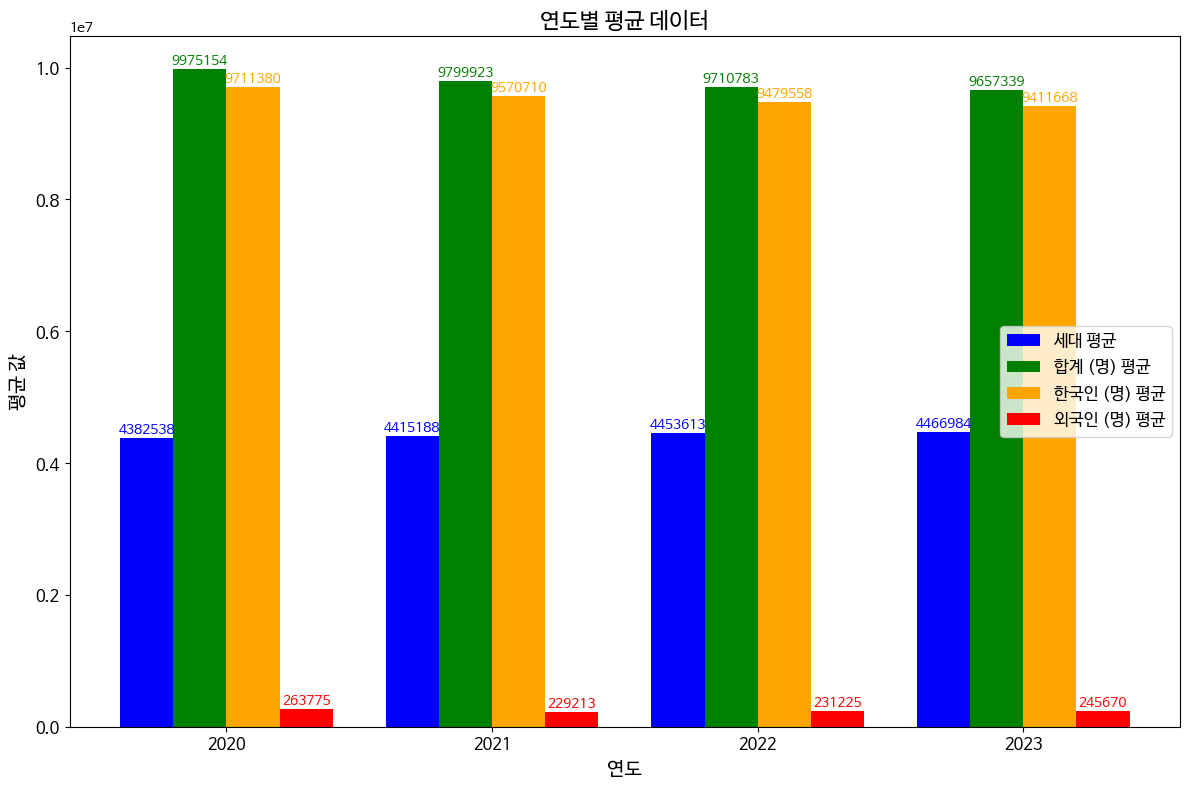

In [54]:
# ===== 8. 막대 그래프 생성 =====
plt.figure(figsize=(12, 8))
x = yearly_data.index

# 막대 그래프 생성 (4가지 지표)
bar_width = 0.2
plt.bar(x - 0.3, yearly_data['세대'], width=bar_width, label='세대 평균', color='blue')
plt.bar(x - 0.1, yearly_data['합계 (명)'], width=bar_width, label='합계 (명) 평균', color='green')
plt.bar(x + 0.1, yearly_data['한국인 (명)'], width=bar_width, label='한국인 (명) 평균', color='orange')
plt.bar(x + 0.3, yearly_data['외국인 (명)'], width=bar_width, label='외국인 (명) 평균', color='red')

# 막대 위에 값 표시
for i, year in enumerate(x):
    plt.text(year - 0.3, yearly_data.loc[year, '세대'], f"{yearly_data.loc[year, '세대']:.0f}", ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(year - 0.1, yearly_data.loc[year, '합계 (명)'], f"{yearly_data.loc[year, '합계 (명)']:.0f}", ha='center', va='bottom', fontsize=10, color='green')
    plt.text(year + 0.1, yearly_data.loc[year, '한국인 (명)'], f"{yearly_data.loc[year, '한국인 (명)']:.0f}", ha='center', va='bottom', fontsize=10, color='orange')
    plt.text(year + 0.3, yearly_data.loc[year, '외국인 (명)'], f"{yearly_data.loc[year, '외국인 (명)']:.0f}", ha='center', va='bottom', fontsize=10, color='red')

# 그래프 제목 및 축 레이블 설정
plt.title('연도별 평균 데이터', fontsize=16)
plt.xlabel('연도', fontsize=14)
plt.ylabel('평균 값', fontsize=14)
plt.xticks(x, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## 5. 상관관계 분석
인구 합계와 평균 거래금액 간 상관관계

In [55]:
# ===== 9. 상관관계 분석 =====
# 인구 합계와 가격의 상관관계 분석
Adddf = []
for add, price in zip(yearly_data['합계 (명)'], yearly_data['가격']):
    Adddf.append({
        "합계": add,
        "가격": price
    })

df6 = pd.DataFrame(Adddf)
df6.set_index(yearly_data.index, inplace=True)
corr = df6.corr()
corr

,합계,가격
합계,1.000000,-0.382597
가격,-0.382597,1.000000


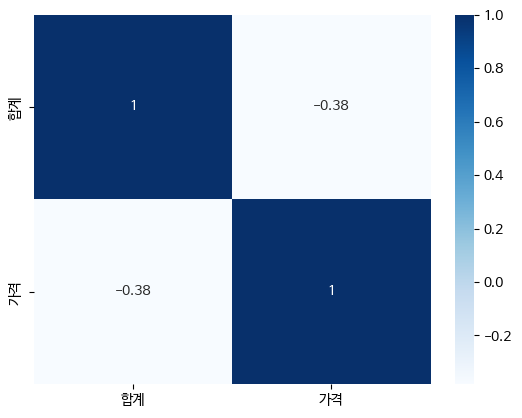

In [58]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 상관관계 히트맵 생성
heatmap = sns.heatmap(
    data=corr,
    cmap="Blues",
    annot=True
)
plt.show()
plt.close()

## 6. 결론

본 프로젝트는 서울시의 연도별 인구 구성(세대 수, 전체 인구, 한국인 및 외국인 인구)과 부동산 평균 실거래 금액, 대출금리 데이터를 종합적으로 분석하여 각 변수 간의 상호 연관성을 파악하고자 했습니다. 분석 결과, 다음과 같은 주요 결론을 도출할 수 있었습니다.

1. 부동산 평균 실거래 가격은 2020년 7,681만 원에서 2021년에 2억 2,921만 원으로 급락했지만, 이후 점진적으로 회복되어 2023년에는 2억 4,567만 원 수준으로 상승했습니다. 이는 2021년의 급격한 하락 이후 점차 회복세를 보인 것으로 해석됩니다.


2. 인구 규모와 부동산 가격 간의 상관관계를 분석한 결과, 약한 음의 상관관계가 발견되었습니다. 다시 말해, 인구가 늘어날수록 부동산 가격이 소폭 하락하는 경향을 보이지만, 그 관계는 매우 약한 수준임을 의미합니다.

## 해석 및 시사점

주택 수요와 부동산 가격은 단순한 인구 증가에만 영향을 받지 않으며, 금리, 정부 정책, 공급 물량 등의 다양한 외부 요인이 복합적으로 작용하고 있음을 알 수 있습니다

사실, 2021년의 급격한 가격 하락은 인구 감소보다는 금리 인상이나 정책 규제와 같은 다른 경제적 요인들의 영향을 더 크게 받았을 가능성이 높습니다.

따라서 앞으로의 연구에서는 인구 데이터에 더해 대출 금리, 공급 물량, 거래량 등의 경제 변수를 포함한 다변량 회귀 분석이나 시계열 모델링을 수행하여 보다 정교하고 깊이 있는 인사이트를 도출할 필요가 있습니다.

4.5 데이터 분석 5 : 대형 마트등 상권 입점에 따른 변화분석

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [60]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [61]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [62]:
#부동산 실거래가 정보 불러오기

data_2020 = pd.read_csv('/content/drive/MyDrive/기말과제/서울시 부동산 실거래가 정보 (2020).csv', encoding='cp949')


data_2021 = pd.read_csv('/content/drive/MyDrive/기말과제/서울시 부동산 실거래가 정보 (2021).csv', encoding='cp949')


data_2022 = pd.read_csv('/content/drive/MyDrive/기말과제/서울시 부동산 실거래가 정보 (2022).csv', encoding='cp949')


data_2023 = pd.read_csv('/content/drive/MyDrive/기말과제/서울시 부동산 실거래가 정보 (2023).csv', encoding='cp949')


#대규모점포 인허가 정보 데이터 불러오기
data_mart = pd.read_csv('/content/drive/MyDrive/기말과제/서울시 대규모점포 인허가 정보.csv', encoding = 'cp949')


<ipython-input-62-5ee5629833d9>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2020 = pd.read_csv('/content/drive/MyDrive/기말과제/서울시 부동산 실거래가 정보 (2020).csv', encoding='cp949')


<Figure size 1400x700 with 0 Axes>

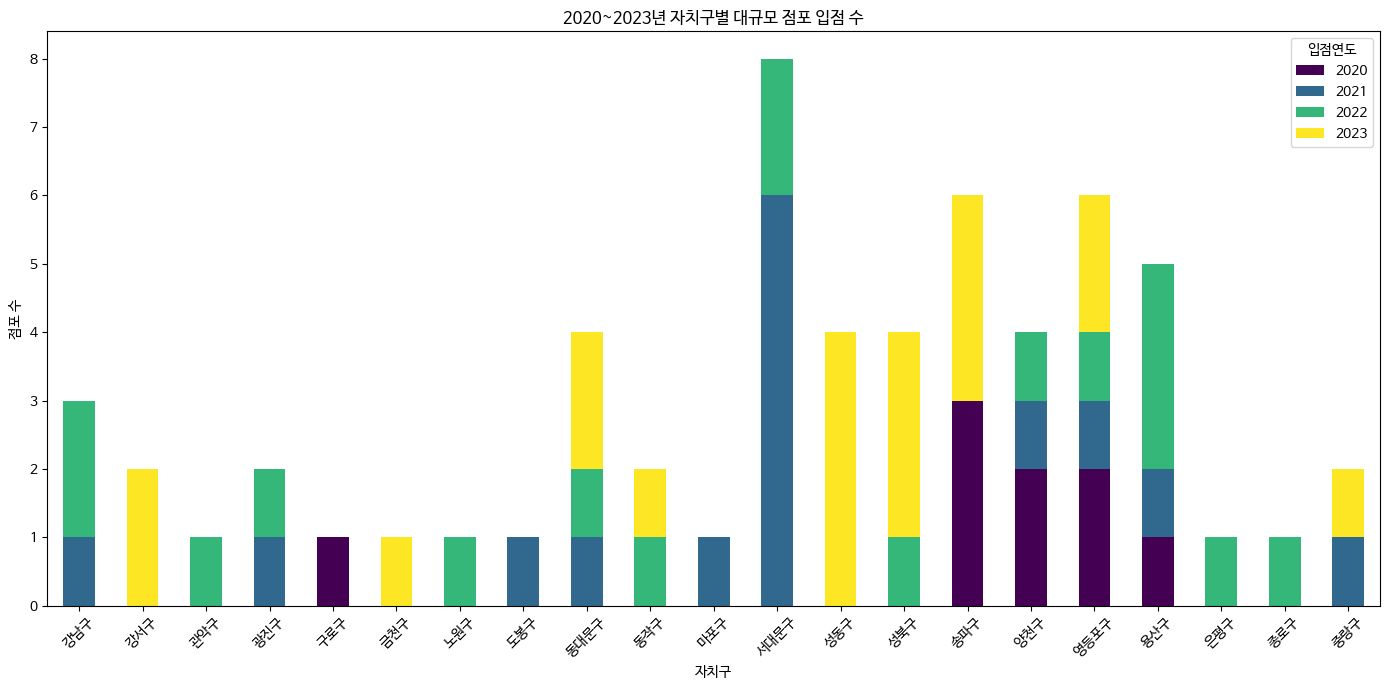

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연도 및 구 추출
data_mart['인허가연도'] = pd.to_datetime(data_mart['인허가일자'], errors='coerce').dt.year
data_mart['자치구명'] = data_mart['도로명주소'].str.extract(r'서울특별시\s*(\S+구)')

# 2020~2023년 필터링
mart_filtered = data_mart[data_mart['인허가연도'].between(2020, 2023)]


# 자치구별 연도별 점포 수 집계
mart_count = mart_filtered.groupby(['자치구명', '인허가연도']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(14, 7))
mart_count.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 7))
plt.title('2020~2023년 자치구별 대규모 점포 입점 수')
plt.ylabel('점포 수')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.legend(title='입점연도')
plt.tight_layout()
plt.show()


<ipython-input-67-0806c40dff83>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gu_order, y=mean_price[year].reindex(gu_order), palette='coolwarm')
<ipython-input-67-0806c40dff83>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gu_order, y=mean_price[year].reindex(gu_order), palette='coolwarm')


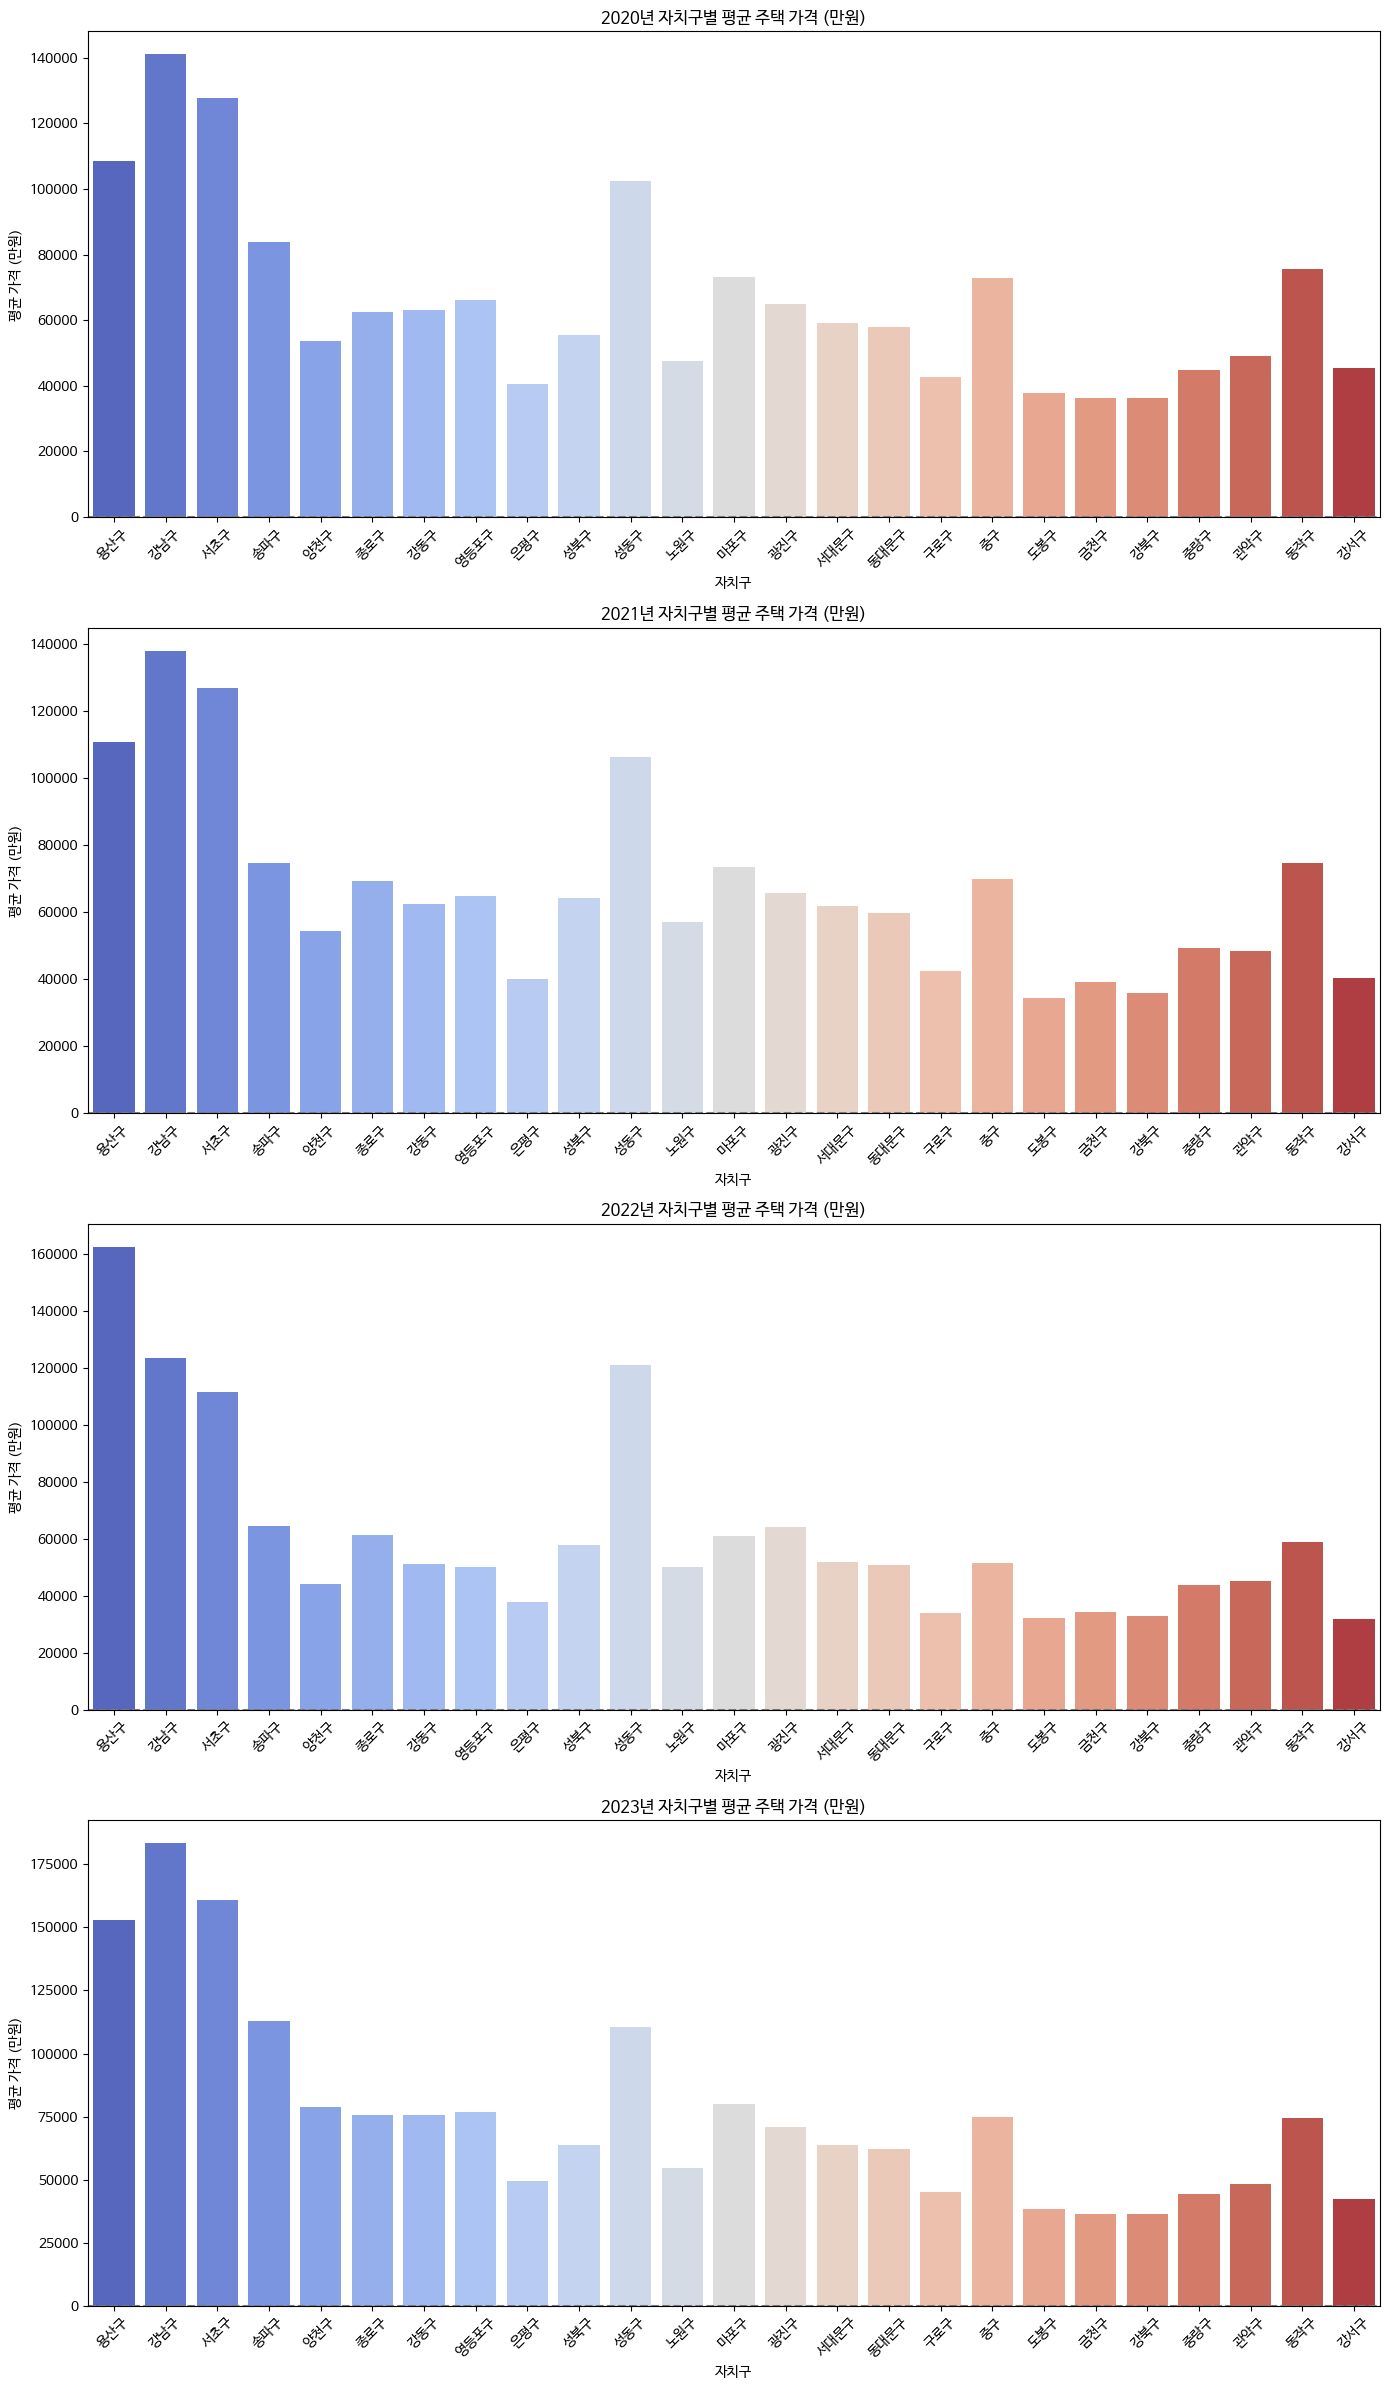

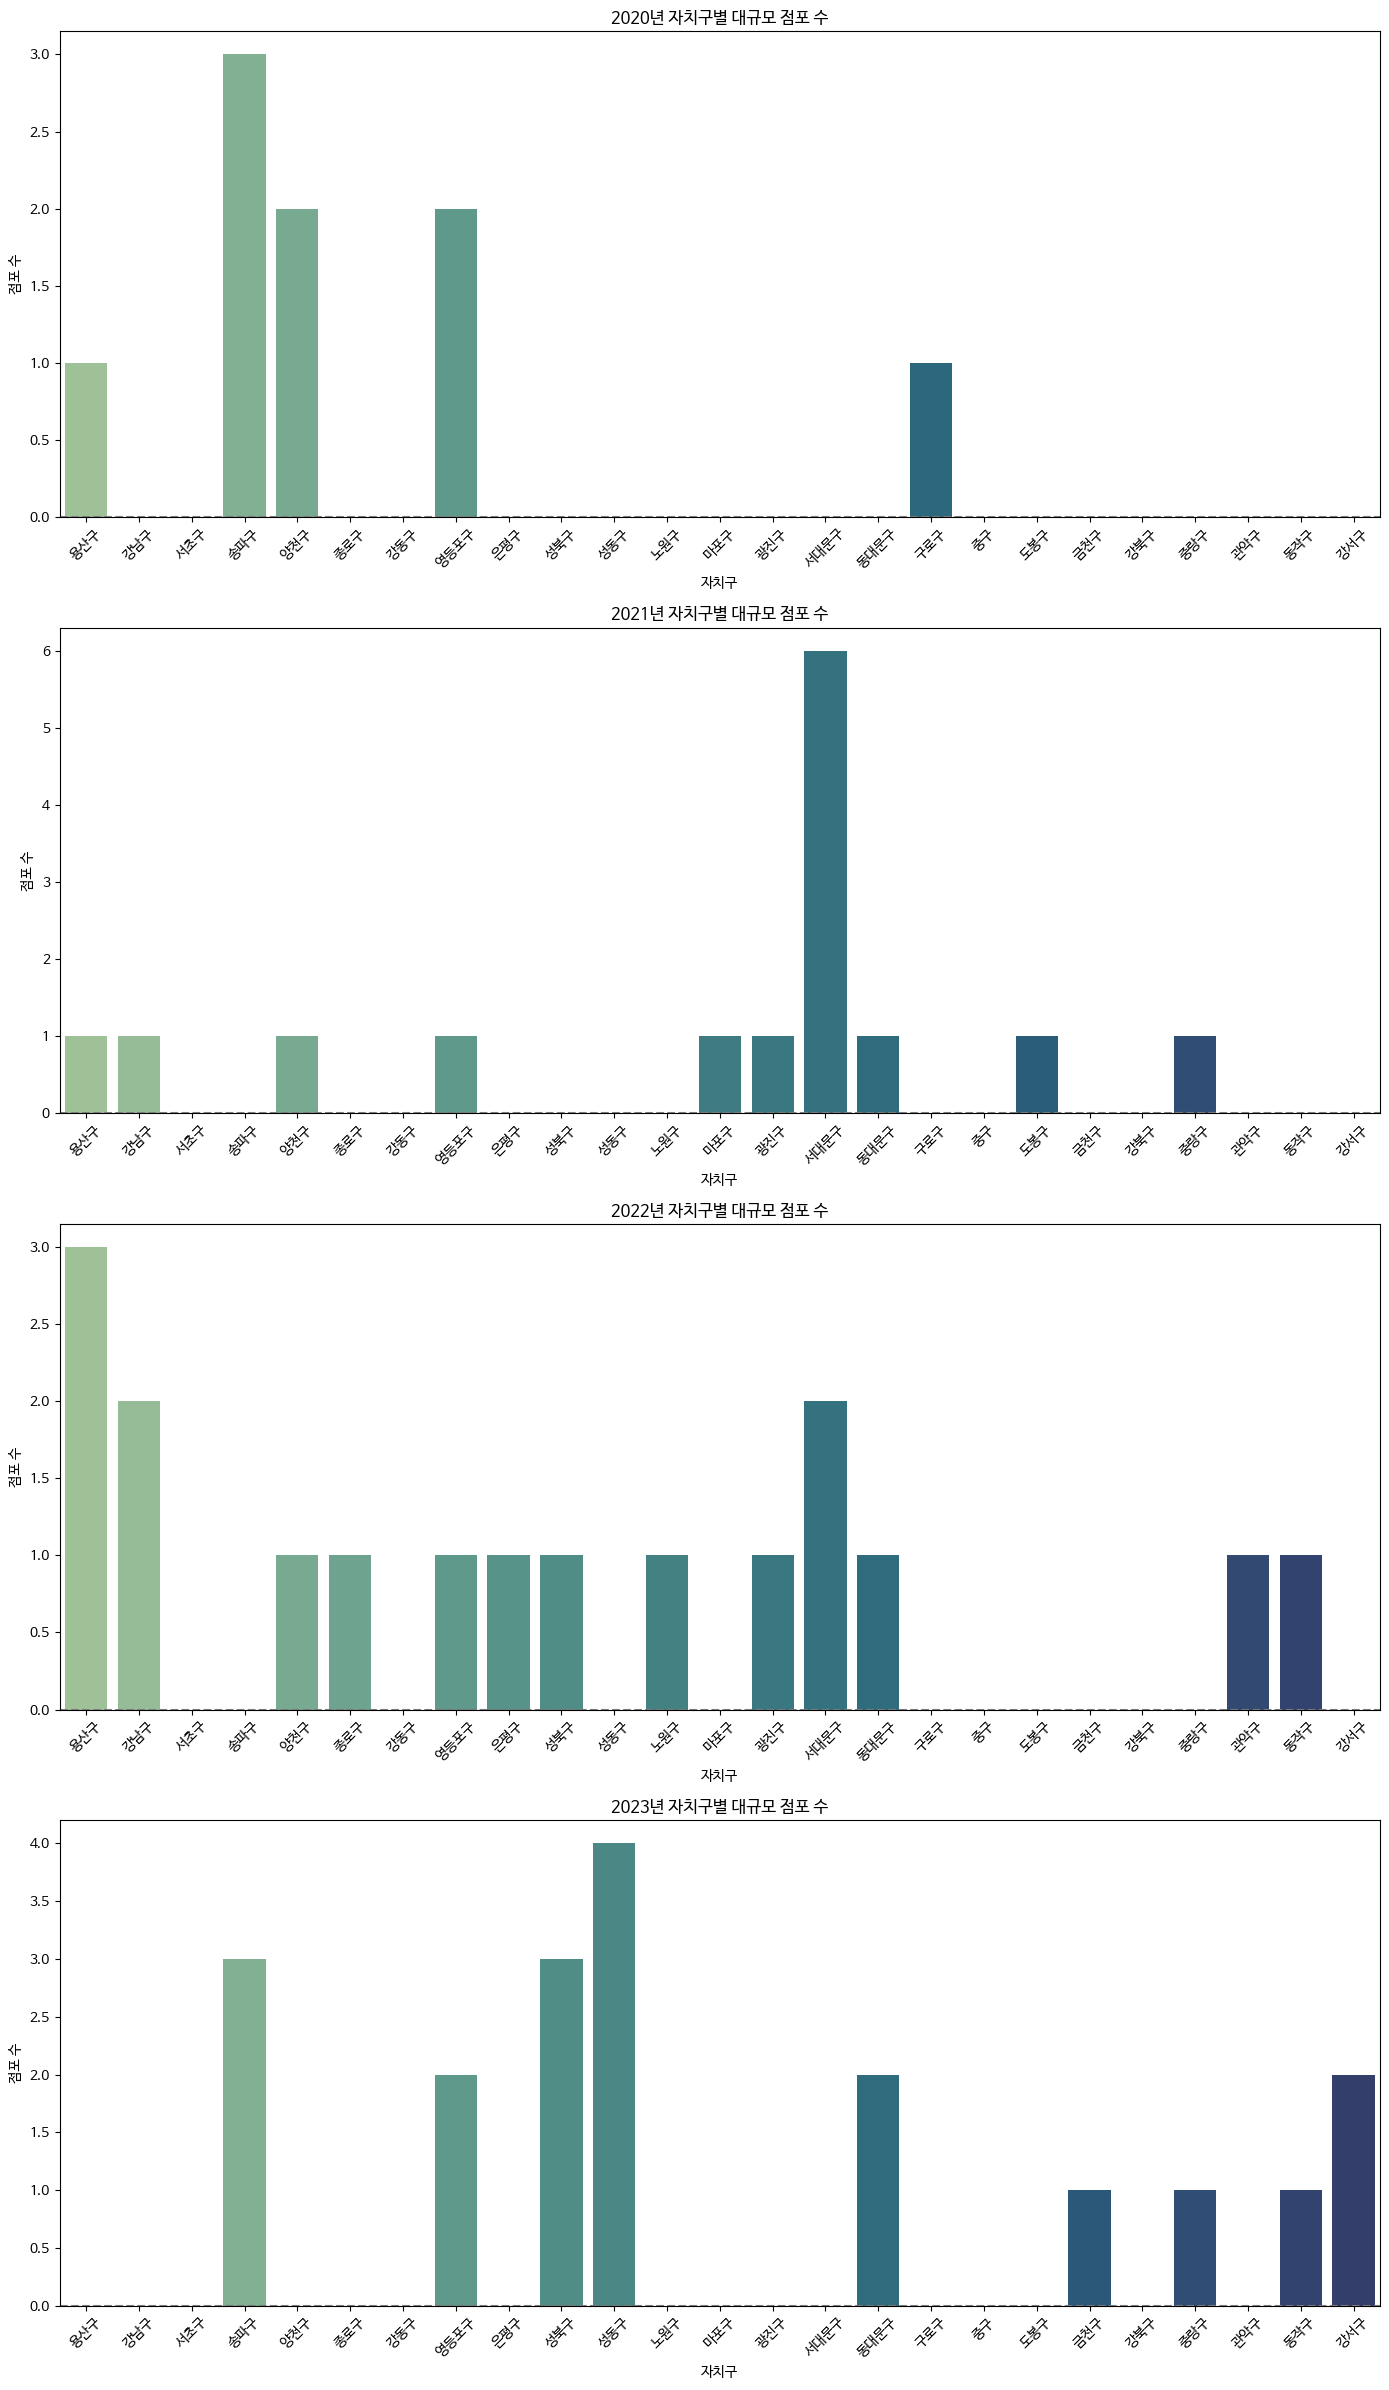

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

data_2020['연도'] = 2020
data_2021['연도'] = 2021
data_2022['연도'] = 2022
data_2023['연도'] = 2023
all_data = pd.concat([data_2020, data_2021, data_2022, data_2023], ignore_index=True)


# 데이터 준비 (가정: all_data와 data_mart는 이미 로드된 상태)
# all_data: 부동산 데이터 (data_2020, data_2021, data_2022, data_2023 병합)
# data_mart: 대규모 점포 데이터

# 연도별 자치구별 평균 주택 가격 계산
price_by_year = all_data[all_data['연도'].between(2020, 2023)]
mean_price = price_by_year.groupby(['자치구명', '연도'])['물건금액(만원)'].mean().unstack()

# 연도별 자치구별 대규모 점포 수 계산
mart_filtered = data_mart[data_mart['인허가연도'].between(2020, 2023)]
mart_count = mart_filtered.groupby(['자치구명', '인허가연도']).size().unstack(fill_value=0)

# 자치구 순서 (2020~2023 가격 변화 기준 정렬)
mean_price['가격증감'] = mean_price[2023] - mean_price[2020]
gu_order = mean_price.sort_values('가격증감', ascending=False).index.tolist()

# 1. 자치구별 연도별 평균 주택 가격 그래프 (4개)
plt.figure(figsize=(14, 24))  # 4개의 그래프를 수직으로 배치
for i, year in enumerate([2020, 2021, 2022, 2023], 1):
    plt.subplot(4, 1, i)
    sns.barplot(x=gu_order, y=mean_price[year].reindex(gu_order), palette='coolwarm')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'{year}년 자치구별 평균 주택 가격 (만원)')
    plt.ylabel('평균 가격 (만원)')
    plt.xlabel('자치구')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

# 2. 자치구별 연도별 대규모 점포 수 그래프 (4개)
plt.figure(figsize=(14, 24))  # 4개의 그래프를 수직으로 배치
for i, year in enumerate([2020, 2021, 2022, 2023], 1):
    plt.subplot(4, 1, i)
    sns.barplot(x=gu_order, y=mart_count[year].reindex(gu_order, fill_value=0), palette='crest')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'{year}년 자치구별 대규모 점포 수')
    plt.ylabel('점포 수')
    plt.xlabel('자치구')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

# 3. 대규모 점포 입점 전후 가격 변화율 분석 및 t-test
mart_year_dict = data_mart.groupby('자치구명')['인허가연도'].min().to_dict()
price_change = []
for gu in all_data['자치구명'].dropna().unique():
    if gu in mart_year_dict:
        입점연도 = mart_year_dict[gu]
        전년 = 입점연도 - 1
        후년 = 입점연도 + 1

        전_data = all_data[(all_data['자치구명'] == gu) & (all_data['연도'] == 전년)]['물건금액(만원)']
        후_data = all_data[(all_data['자치구명'] == gu) & (all_data['연도'] == 후년)]['물건금액(만원)']

        if not 전_data.empty and not 후_data.empty:
            전평균 = 전_data.mean()
            후평균 = 후_data.mean()
            변화율 = ((후평균 - 전평균) / 전평균) * 100
            # t-test 수행
            t_stat, p_value = ttest_ind(전_data, 후_data, equal_var=False)  # Welch's t-test
            price_change.append({
                '자치구명': gu,
                '입점연도': 입점연도,
                '전년평균': 전평균,
                '후년평균': 후평균,
                '변화율': 변화율,
                'p_value': p_value
            })

df_price_change = pd.DataFrame(price_change)



2020년부터 2023년까지 서울시 각 자치구에 입점한 대규모 점포 수를 분석한 결과, 서대문구, 성북구, 송파구, 양천구, 영등포구, 용산구 등에서 점포 입점이 활발하게 이루어진 것으로 나타났다.

특히 서대문구는 2021년에만 6개의 점포가 입점하여 가장 높은 단일 연도 수치를 기록하였으며, 송파구와 영등포구는 2020년부터 꾸준히 입점이 이루어진 자치구로 확인된다. 반면 도봉구, 은평구, 중구 등 일부 자치구는 전체 기간 동안 입점 수가 1건 이하로 낮아 상대적으로 입점 활성이 떨어지는 지역으로 보인다.

또한 2023년은 전반적으로 여러 자치구에서 점포 수가 증가한 양상을 보여, 최근 1년간 대규모 점포의 신규 입점이 활발했음을 시사한다. 이는 코로나19 이후 상권 회복 및 신규 개발 사업과 관련된 영향일 가능성이 있다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

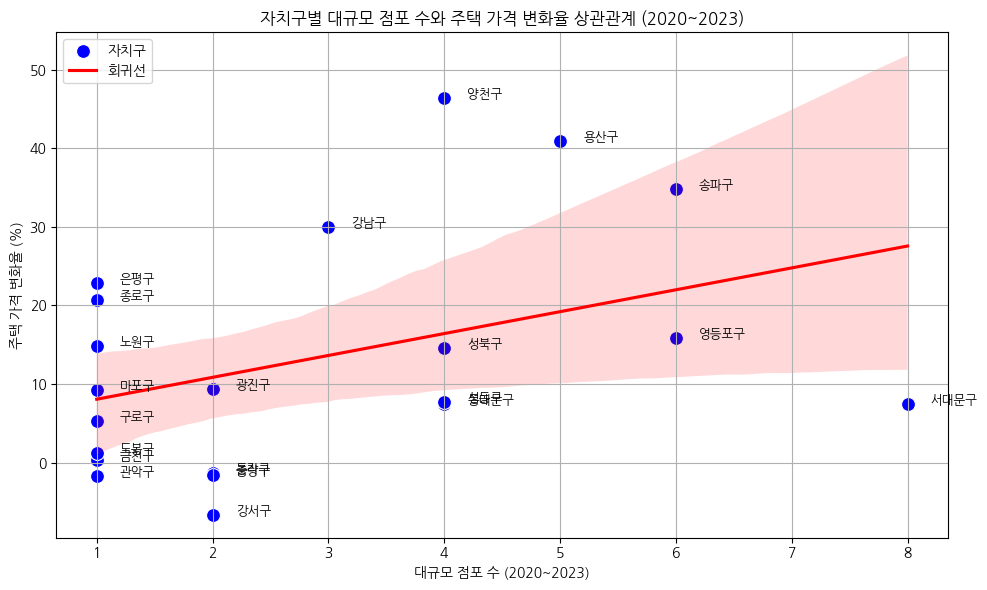

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

mart_count_total = mart_filtered.groupby('자치구명').size()

# 한글 폰트 설정 (Google Colab에서 한글 깨짐 방지)
plt.rcParams['font.family'] = 'NanumGothic'
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 준비
# mean_price는 이미 계산된 상태: 자치구별 연도별 평균 주택 가격
# mart_count_total은 자치구별 2020~2023년 대규모 점포 수

# 가격 변화율 계산 (2020년 대비 2023년)
mean_price['가격변화율'] = ((mean_price[2023] - mean_price[2020]) / mean_price[2020]) * 100

# 데이터 결합: 가격 변화율과 점포 수
data_corr = pd.DataFrame({
    '가격변화율': mean_price['가격변화율'],
    '점포수': mart_count_total
}).dropna()

# 상관계수 계산
corr, p_value = pearsonr(data_corr['가격변화율'], data_corr['점포수'])
print(f"상관계수: {corr:.3f}, p-value: {p_value:.3f}")

# 상관관계 시각화 (산점도 + 회귀선)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='점포수', y='가격변화율', data=data_corr, s=100, color='blue', label='자치구')
sns.regplot(x='점포수', y='가격변화율', data=data_corr, scatter=False, color='red', label='회귀선')

# 자치구명 라벨 추가
for i, gu in enumerate(data_corr.index):
    plt.text(data_corr['점포수'][i] + 0.2, data_corr['가격변화율'][i], gu, fontsize=9)

plt.title('자치구별 대규모 점포 수와 주택 가격 변화율 상관관계 (2020~2023)')
plt.xlabel('대규모 점포 수 (2020~2023)')
plt.ylabel('주택 가격 변화율 (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

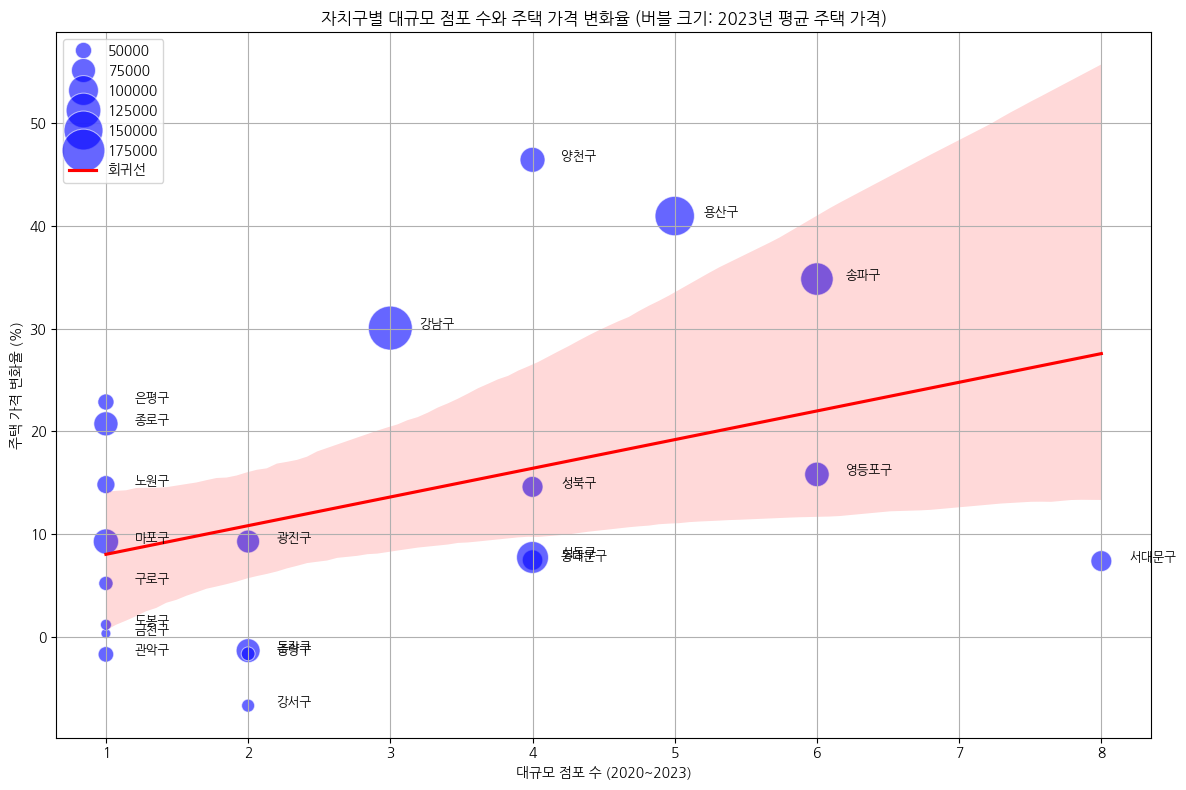

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 한글 폰트 설정 (Google Colab에서 한글 깨짐 방지)
plt.rcParams['font.family'] = 'NanumGothic'
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 준비
# mean_price: 자치구별 연도별 평균 주택 가격
# mart_count_total: 자치구별 2020~2023년 대규모 점포 수

# 가격 변화율 계산 (2020년 대비 2023년)
mean_price['가격변화율'] = ((mean_price[2023] - mean_price[2020]) / mean_price[2020]) * 100

# 데이터 결합: 점포 수, 가격 변화율, 2023년 평균 주택 가격(버블 크기용)
data_corr = pd.DataFrame({
    '가격변화율': mean_price['가격변화율'],
    '점포수': mart_count_total,
    '평균주택가격_2023': mean_price[2023]  # 버블 크기용 추가 변수
}).dropna()

# 상관계수 계산
corr, p_value = pearsonr(data_corr['가격변화율'], data_corr['점포수'])
print(f"상관계수: {corr:.3f}, p-value: {p_value:.3f}")

# 버블 플롯 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(x='점포수', y='가격변화율', size='평균주택가격_2023',
                sizes=(50, 1000), alpha=0.6, data=data_corr, color='blue', legend='brief')

# 자치구명 라벨 추가
for i, gu in enumerate(data_corr.index):
    plt.text(data_corr['점포수'][i] + 0.2, data_corr['가격변화율'][i], gu, fontsize=9)

# 회귀선 추가
sns.regplot(x='점포수', y='가격변화율', data=data_corr, scatter=False, color='red', label='회귀선')

plt.title('자치구별 대규모 점포 수와 주택 가격 변화율 (버블 크기: 2023년 평균 주택 가격)')
plt.xlabel('대규모 점포 수 (2020~2023)')
plt.ylabel('주택 가격 변화율 (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()

자치구별 대규모 점포 수와 주택 가격 변화율 관계 분석
(버블 크기: 2023년 평균 주택 가격 기준)

2020년부터 2023년까지 서울시 자치구별 대규모 점포 수와 같은 기간 주택 가격 변화율 간의 관계를 분석한 결과, 두 변수 간에는 약한 양의 상관관계(상관계수 ≈ 0.394)가 관찰되었다. 이는 대체로 대규모 점포 수가 많을수록 주택 가격이 상승하는 경향이 있다는 것을 의미하나, 통계적으로 유의미한 수준(p-value = 0.077)에는 다소 못 미친다.


주요 해석:

양천구, 용산구, 송파구는 대규모 점포 수가 상대적으로 많고, 주택 가격 상승률도 높은 구로 나타났다. 이는 활발한 상업 개발이 주택 수요 증가 및 가격 상승에 긍정적인 영향을 줄 수 있음을 시사한다.

서대문구는 대규모 점포 수가 가장 많음(8개)에도 불구하고 주택 가격 상승률은 낮은 편이다. 이는 상권 외의 요인(예: 교육 환경, 교통 접근성, 노후 주거지 비중 등)이 주택 가격 변화에 더 큰 영향을 주었을 가능성을 나타낸다.

강남구는 점포 수는 적지만 주택 가격 상승률과 평균 가격 모두 높은 수준으로, 전통적인 인기 지역은 상권과 무관하게 높은 가격을 유지하고 있는 모습이다.

강서구, 동작구, 관악구 등은 대규모 점포 수와 가격 상승률 모두 낮은 그룹에 속하며, 외곽 지역의 개발 여건이나 수요가 상대적으로 제한적인 것으로 보인다.


결론:
대규모 상업시설의 입점은 주택 가격 상승에 일정 부분 긍정적 영향을 미칠 수 있으나, 주택 시장은 상권뿐 아니라 복합적인 요인(교통, 교육, 브랜드 아파트, 개발 계획 등)이 함께 작용하는 구조이다.

상관계수가 약 0.394로 나타난 만큼, 대규모 점포 수와 주택 가격 변화율 사이에는 어느 정도 상관이 있으나 이를 단일 인과 관계로 보기에는 무리가 있다.

5. 주요 데이터 분석 결과 요약

[1] 교통 인프라와 주택 가격 변화
역 개수와의 상관계수는 분석 중 중간 수준의 양의 상관이 발견됨

강남, 마포, 송파 등 교통 중심지 가격 상승 두드러짐

다만, 역 개수만으로는 가격을 설명하기엔 한계 → 역세권 프리미엄과 인근 개발 정보 필요

[2] 범죄율과 주택 가격 변화
범죄율과의 관계에서는 전반적으로 약한 음의 상관관계 관찰

특히 강북, 중랑 등 범죄율 높은 지역의 가격 상승률이 낮은 경향

치안은 주택 수요에 영향을 줄 수 있는 간접 요소로 파악됨

[3] 상권(대규모 점포 수)과 주택 가격 변화
상관계수: 0.394, p-value: 0.077

양의 상관관계가 있지만 통계적으로 유의미하다고 보기에는 다소 약함

일부 구(용산구, 송파구, 양천구)는 점포 수와 가격 상승이 동시에 높은 반면, 서대문구는 점포 수는 많지만 가격 상승률은 낮음 → 다른 요인들과의 결합 필요


6. 예측모델

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [72]:
df20 = pd.read_csv("/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2020).csv", encoding='cp949')
df21 = pd.read_csv("/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2021).csv", encoding='cp949')
df22 = pd.read_csv("/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2022).csv", encoding='cp949')
df23 = pd.read_csv("/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2023).csv", encoding='cp949')


<ipython-input-72-54c15e1f87ec>:2: DtypeWarning: Columns (7,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df21 = pd.read_csv("/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/서울시 부동산 실거래가 정보 (2021).csv", encoding='cp949')


In [73]:
price_col = "물건금액(만원)"
# 1) 카테고리화 범주 계산
p_min = df20[price_col].min()
p_max = df20[price_col].max()
p_avg = df20[price_col].mean()
pivot_high = (p_avg + p_max) / 2
pivot_low  = (p_avg + p_min) / 2

# 2) 가격 → 카테고리 매핑 함수 정의
def price_category(price):
    if price > pivot_high:
        return 1
    elif price > pivot_low:
        return 2
    else:
        return 3

# 3) apply 로 컬럼 생성
df20['가격범위'] = df20[price_col].apply(price_category)
df21['가격범위'] = df20[price_col].apply(price_category)
df22['가격범위'] = df20[price_col].apply(price_category)
df23['가격범위'] = df20[price_col].apply(price_category)
# 확인
df20.head()


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,가격범위
0,2020,11230,동대문구,11000,이문동,NaN,NaN,NaN,NaN,NaN,...,75.57,132.00,NaN,NaN,NaN,1967.0,단독다가구,NaN,NaN,2
1,2020,11680,강남구,10300,개포동,1.0,대지,1280,0.0,래미안블레스티지,...,84.94,0.00,1.0,NaN,NaN,2019.0,아파트,NaN,NaN,2
2,2020,11260,중랑구,10300,중화동,NaN,NaN,NaN,NaN,NaN,...,99.18,195.00,NaN,NaN,NaN,1977.0,단독다가구,NaN,NaN,2
3,2020,11710,송파구,10400,송파동,1.0,대지,0097,44.0,삼구주택(97-44),...,55.20,29.89,3.0,NaN,NaN,2011.0,연립다세대,NaN,NaN,2
4,2020,11560,영등포구,11500,당산동5가,1.0,대지,0042,0.0,당산삼성래미안4차,...,133.42,0.00,12.0,NaN,NaN,2003.0,아파트,NaN,NaN,2


In [74]:
# 1) price_cat처럼 함수 정의하기
def building_code(bld):
    if   bld == "단독다가구": return 0
    elif bld == "아파트":     return 1
    elif bld == "연립다세대": return 2
    elif bld == "오피스텔":   return 3
    else:                    return -1  # 기타

dfs_year = [df20, df21, df22, df23]
# 2) apply 로 새로운 컬럼 생성
for df in dfs_year:
    df['용도_code'] = df['건물용도'].apply(building_code)

# 3) 결과 확인
print(df[['건물용도','용도_code']].head())
print("용도_code 고유값:", sorted(df['용도_code'].unique()))


    건물용도  용도_code
0  연립다세대        2
1  단독다가구        0
2  단독다가구        0
3  연립다세대        2
4  연립다세대        2
용도_code 고유값: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]


In [85]:
df0 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/5대+범죄+발생현황_20250408153002.csv', encoding='utf-8-sig', header=None)

df_data0 = df0.iloc[5:].reset_index(drop=True)

year_col_idx = {
    2020: 2,
    2021: 14,
    2022: 26,
    2023: 38
}
crime_summary = pd.DataFrame({
    '자치구별': df_data0.iloc[:, 1]
})
for year, idx in year_col_idx.items():
    crime_summary[str(year)] = pd.to_numeric(df_data0.iloc[:, idx], errors='coerce')

crime_summary.head(10)

IndexError: single positional indexer is out-of-bounds

In [86]:
import pandas as pd

# 1. 파일 읽기 (헤더 없이)
df0 = pd.read_csv('/content/drive/MyDrive/2025/01/01_01_파이썬데이터분석/프로젝트/데이터 파일/5대+범죄+발생현황_20250408153002.csv',
                     encoding='utf-8-sig', header=None)

# 2. 실제 데이터만 추출 (5번째 줄부터)
df_data0 = df0.iloc[5:].reset_index(drop=True)

# 3. 컬럼 이름 지정
df_data0.columns = ['자치구별', '2020', '2021', '2022', '2023']

# 4. 숫자형 변환 (발생 수치)
for year in ['2020', '2021', '2022', '2023']:
    df_data0[year] = pd.to_numeric(df_data0[year], errors='coerce')

# 5. crime_summary 만들기
crime_summary = df_data0[['자치구별', '2020', '2021', '2022', '2023']].copy()

# 필요 시 "소계" 행 제거
crime_summary = crime_summary[crime_summary['자치구별'] != '소계']

# 결과 확인
print(crime_summary.head(10))


   자치구별  2020  2021  2022  2023
0    중구  3411  2861  3071  3348
1   용산구  2969  2381  2967  3021
2   성동구  2362  2112  2194  2023
3   광진구  3601  3087  3619  3424
4  동대문구  3401  2959  3253  2957
5   중랑구  3726  3210  3599  3324
6   성북구  2567  2411  2749  2411
7   강북구  2770  2301  2832  2497
8   도봉구  2179  1860  2141  1921
9   노원구  3743  3425  3896  3567


In [87]:
for year in ['2020', '2021', '2022', '2023']:
    # pd.qcut을 사용하여 4개의 동일한 개수 구간으로 나누고, 레이블 1~4를 부여
    crime_summary[f"{year}_cat"] = pd.qcut(
        crime_summary[year],
        q=4,
        labels=[1, 2, 3, 4]
    )

# 결과 확인: 예시로 2020년과 2023년 카테고리 함께 보기
display(crime_summary[['자치구별', '2020', '2020_cat', '2023', '2023_cat']])

print("2020년 분위수 (Q1, Q2, Q3):")
print(crime_summary['2020'].quantile([0.25, 0.50, 0.75]))
print("\n2021년 분위수 (Q1, Q2, Q3):")
print(crime_summary['2021'].quantile([0.25, 0.50, 0.75]))
print("\n2022년 분위수 (Q1, Q2, Q3):")
print(crime_summary['2022'].quantile([0.25, 0.50, 0.75]))
print("\n2023년 분위수 (Q1, Q2, Q3):")
print(crime_summary['2023'].quantile([0.25, 0.50, 0.75]))

,자치구별,2020,2020_cat,2023,2023_cat
0,중구,3411,2,3348,2
1,용산구,2969,2,3021,2
2,성동구,2362,1,2023,1
3,광진구,3601,3,3424,3
4,동대문구,3401,2,2957,2
5,중랑구,3726,3,3324,2
6,성북구,2567,1,2411,1
7,강북구,2770,1,2497,1
8,도봉구,2179,1,1921,1
9,노원구,3743,3,3567,3


2020년 분위수 (Q1, Q2, Q3):
0.25    2919.25
0.50    3506.00
0.75    4235.00
Name: 2020, dtype: float64

2021년 분위수 (Q1, Q2, Q3):
0.25    2432.0
0.50    3148.5
0.75    3569.0
Name: 2021, dtype: float64

2022년 분위수 (Q1, Q2, Q3):
0.25    2811.25
0.50    3543.00
0.75    4186.75
Name: 2022, dtype: float64

2023년 분위수 (Q1, Q2, Q3):
0.25    2605.75
0.50    3373.00
0.75    3949.50
Name: 2023, dtype: float64


In [ ]:
# crime_summary를 '자치구별'을 인덱스로 설정한 뒤, 연도별 카테고리 시리즈를 추출
crime_summary_indexed = crime_summary.set_index('자치구별')

# 연도별 DataFrame과 연도 이름을 리스트에 담기
dfs = [df20, df21, df22, df23]
years = ['2020', '2021', '2022', '2023']

for df, yr in zip(dfs, years):
    # 그 연도의 범죄 카테고리 시리즈를 가져와 매핑용 딕셔너리 생성
    mapping = crime_summary_indexed[f"{yr}_cat"].to_dict()

    # df에는 '자치구명' 컬럼이 있다고 가정하고, 맵핑을 통해 새로운 열을 추가
    df[f"crime"] = df['자치구명'].map(mapping).astype(int)
df21.head()

In [97]:
dfs = [df20, df21, df22, df23]
years = [2020, 2021, 2022, 2023]

# for문으로 순회하며 연도컬럼 추가
for df, yr in zip(dfs, years):
    df['연도'] = yr
df21.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,가격범위,용도_code,crime,연도
0,2021,11440,마포구,11500,상수동,1.0,대지,157.0,1.0,세방글로벌시티,...,NaN,20220329.0,2005.0,오피스텔,중개거래,서울 마포구,2,3,3,2021
1,2021,11230,동대문구,10500,답십리동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2014.0,단독다가구,중개거래,서울 동대문구,2,0,2,2021
2,2021,11560,영등포구,10300,영등포동2가,1.0,대지,94.0,154.0,여의도 디앤써밋,...,NaN,NaN,2019.0,오피스텔,중개거래,서울 영등포구,2,3,4,2021
3,2021,11590,동작구,10800,대방동,1.0,대지,500.0,0.0,성원,...,NaN,NaN,1994.0,아파트,중개거래,서울 영등포구,2,1,2,2021
4,2021,11260,중랑구,10100,면목동,1.0,대지,1538.0,0.0,주함해븐빌,...,NaN,NaN,2017.0,연립다세대,중개거래,서울 중랑구,2,2,3,2021


In [98]:
# 분석에 쓸 칼럼 리스트
col_names = ['자치구코드','물건금액(만원)','건물면적(㎡)','층','건축년도','용도_code','crime','연도']

# 각 연도별로 서브셋 복사
df20_sub = df20[col_names].copy()
df21_sub = df21[col_names].copy()
df22_sub = df22[col_names].copy()
df23_sub = df23[col_names].copy()

# 확인
print(df20_sub.shape, df21_sub.shape, df22_sub.shape, df23_sub.shape)
df20_sub.head()

(183900, 8) (138699, 8) (66345, 8) (69801, 8)


,자치구코드,물건금액(만원),건물면적(㎡),층,건축년도,용도_code,crime,연도
0,11230,85000,75.57,NaN,1967.0,0,2,2020
1,11680,251000,84.94,1.0,2019.0,1,4,2020
2,11260,85000,99.18,NaN,1977.0,0,3,2020
3,11710,38000,55.20,3.0,2011.0,2,4,2020
4,11560,180000,133.42,12.0,2003.0,1,4,2020


In [99]:
dfs_sub = [df20_sub, df21_sub, df22_sub, df23_sub]

for df in [df20_sub, df21_sub, df22_sub, df23_sub]:
    df.dropna(subset=col_names, inplace=True)
df23_sub

,자치구코드,물건금액(만원),건물면적(㎡),층,건축년도,용도_code,crime,연도
0,11380,33500,43.04,2.0,2005.0,2,3,2023
3,11710,11000,13.38,5.0,2012.0,2,4,2023
4,11530,29550,29.99,3.0,2023.0,2,3,2023
5,11530,27300,29.29,3.0,2023.0,2,3,2023
6,11530,25300,26.85,2.0,2023.0,2,3,2023
...,...,...,...,...,...,...,...,...
69795,11440,100000,61.19,1.0,1977.0,2,3,2023
69796,11500,36800,29.47,6.0,2015.0,2,4,2023
69797,11380,73500,84.96,9.0,2006.0,1,3,2023
69798,11440,15500,16.36,13.0,2018.0,3,3,2023


In [100]:
df_sub = pd.concat(dfs_sub, ignore_index=True)
df_sub

,자치구코드,물건금액(만원),건물면적(㎡),층,건축년도,용도_code,crime,연도
0,11680,251000,84.94,1.0,2019.0,1,4,2020
1,11710,38000,55.20,3.0,2011.0,2,4,2020
2,11560,180000,133.42,12.0,2003.0,1,4,2020
3,11110,19500,30.00,2.0,2003.0,2,0,2020
4,11110,33500,58.40,5.0,2003.0,2,0,2020
...,...,...,...,...,...,...,...,...
425136,11440,100000,61.19,1.0,1977.0,2,3,2023
425137,11500,36800,29.47,6.0,2015.0,2,4,2023
425138,11380,73500,84.96,9.0,2006.0,1,3,2023
425139,11440,15500,16.36,13.0,2018.0,3,3,2023


In [101]:
# 2024년 시점을 기준으로 “건물나이” 계산
df_sub['건물연도'] = 2024 - df_sub['건축년도']
df_sub['건물연도'] = df_sub['건물연도'].astype(int)
df_sub['층'] = df_sub['층'].astype(int)
# 원본 열 삭제
df_sub.drop(columns=['건축년도'], inplace=True)

df_sub

,자치구코드,물건금액(만원),건물면적(㎡),층,용도_code,crime,연도,건물연도
0,11680,251000,84.94,1,1,4,2020,5
1,11710,38000,55.20,3,2,4,2020,13
2,11560,180000,133.42,12,1,4,2020,21
3,11110,19500,30.00,2,2,0,2020,21
4,11110,33500,58.40,5,2,0,2020,21
...,...,...,...,...,...,...,...,...
425136,11440,100000,61.19,1,2,3,2023,47
425137,11500,36800,29.47,6,2,4,2023,9
425138,11380,73500,84.96,9,1,3,2023,18
425139,11440,15500,16.36,13,3,3,2023,6


In [102]:
feature_cols = ['자치구코드','건물면적(㎡)','층','건물연도','용도_code','crime','연도']
X = df_sub[feature_cols]
y = df_sub['물건금액(만원)']

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 연속형 가격(만원)을 타깃으로 할 때
X = df_sub[feature_cols]
y = df_sub['물건금액(만원)']  # 실제 가격 정보가 있다면

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RF Regression RMSE: {rmse:.1f}, R²: {r2:.3f}")


RF Regression RMSE: 23477.7, R²: 0.844


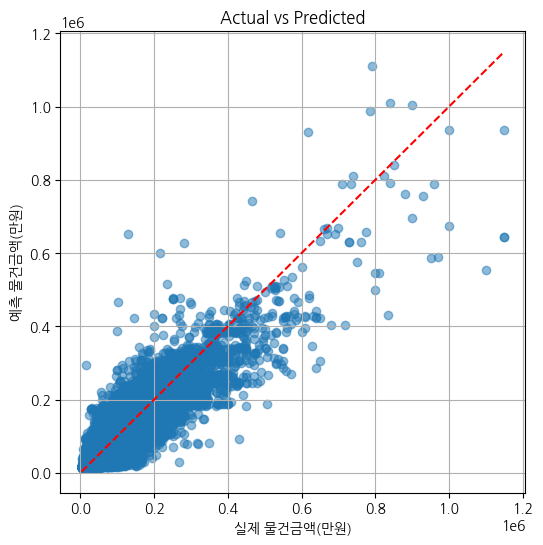

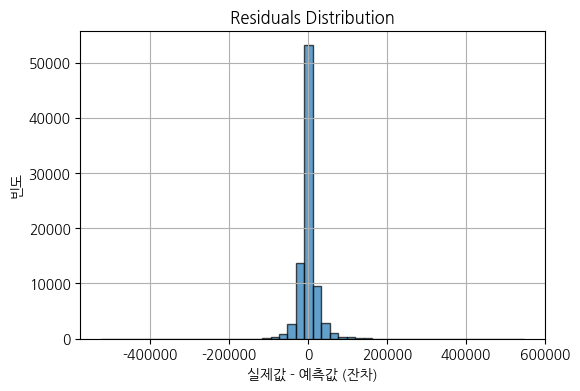

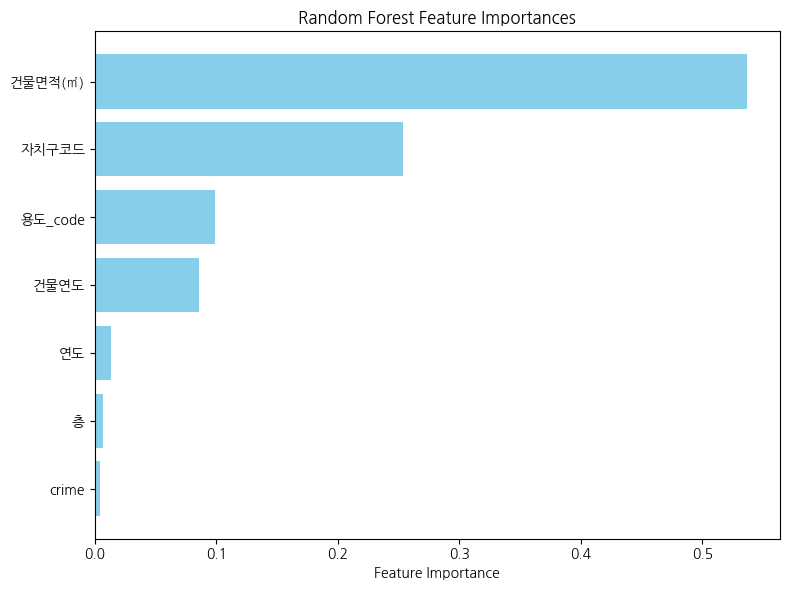

In [104]:
# 1) 데이터 준비 (features, target)
X = df_sub[feature_cols]
y = df_sub['물건금액(만원)']

# 2) 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) 모델 학습
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)

# 4) 예측
y_pred = rf_reg.predict(X_test)

# 5) 시각화

# (1) 실제 vs 예측 산점도
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("실제 물건금액(만원)")
plt.ylabel("예측 물건금액(만원)")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

# (2) 잔차 분포 히스토그램
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel("실제값 - 예측값 (잔차)")
plt.ylabel("빈도")
plt.title("Residuals Distribution")
plt.grid(True)
plt.show()

# (3) 피처 중요도 시각화
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]
feat_names_sorted = [feature_cols[i] for i in indices]

plt.figure(figsize=(8, 6))
plt.barh(feat_names_sorted, importances[indices], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()  # 중요도 높은 순서대로 위로
plt.tight_layout()
plt.show()


In [105]:
feature_cols = ['자치구코드','건물면적(㎡)','층','건물연도','용도_code','crime','연도']
#마포구(코드=12), 면적=85㎡, 10층, 용도_code=1, crime=2, 연도=2024, 건물연도=9
new_data = {
    '자치구코드': 12,
    '건물면적(㎡)': 85,
    '층': 10,
    '용도_code': 1,
    'crime': 2,
    '연도': 2024,
    '건물연도': 9
}
sample = pd.DataFrame([new_data], columns=feature_cols)
sample

,자치구코드,건물면적(㎡),층,건물연도,용도_code,crime,연도
0,12,85,10,9,1,2,2024


실제 vs 예측 산점도

 대부분의 점들은 빨간 대각선(이상적인 예측)을 중심으로 잘 분포되어 있으나, 고가 매물부터는 예측이 다소 과소되는 경향이 보입니다.


잔차 분포
중심이 0에 가까우며 대칭적으로 분포된 좋은 모습입니다.

랜덤 포레스트 특징 중요성
가장 영향력이 큰 변수는 건물면적, 다음으로 자치구코드, 용도코드 순입니다.
범죄율, 연도, 층수 등은 영향이 낮게 나타났습니다.

In [106]:
predicted_price = rf_reg.predict(sample)
print(f"예측된 매물 가격(만원): {predicted_price[0]:,.0f} 만원")

예측된 매물 가격(만원): 156,325 만원


7. 종합 해석 및 결론

서울시 주택 가격 변화에 영향을 주는 요인은 단일 요소보다는 복합적 요인(상권, 교통, 치안, 기존 선호도 등)의 결합으로 작용하는 것으로 분석된다.

대규모 상권 입점은 가격 상승과 어느 정도 관계가 있으나, 유의미한 인과관계를 단언하기 어렵다.

교통 인프라(특히 중심 노선 근접성)는 주택 가격 변화에 지속적인 영향을 미치는 핵심 요소로 추정된다.

범죄율은 가격 하락과의 직접적 관계보다는 수요에 간접적 영향을 미치는 요인으로 해석된다.